### Imports

In [144]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px

In [2]:
data=pd.read_csv("data\products.csv",sep='	')
data.head()

C:\Users\blanc\AppData\Local\Temp\ipykernel_9512\364748533.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("data\products.csv",sep='	')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(320772, 162)

In [4]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

### Complétude des données

In [5]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

<Axes: >

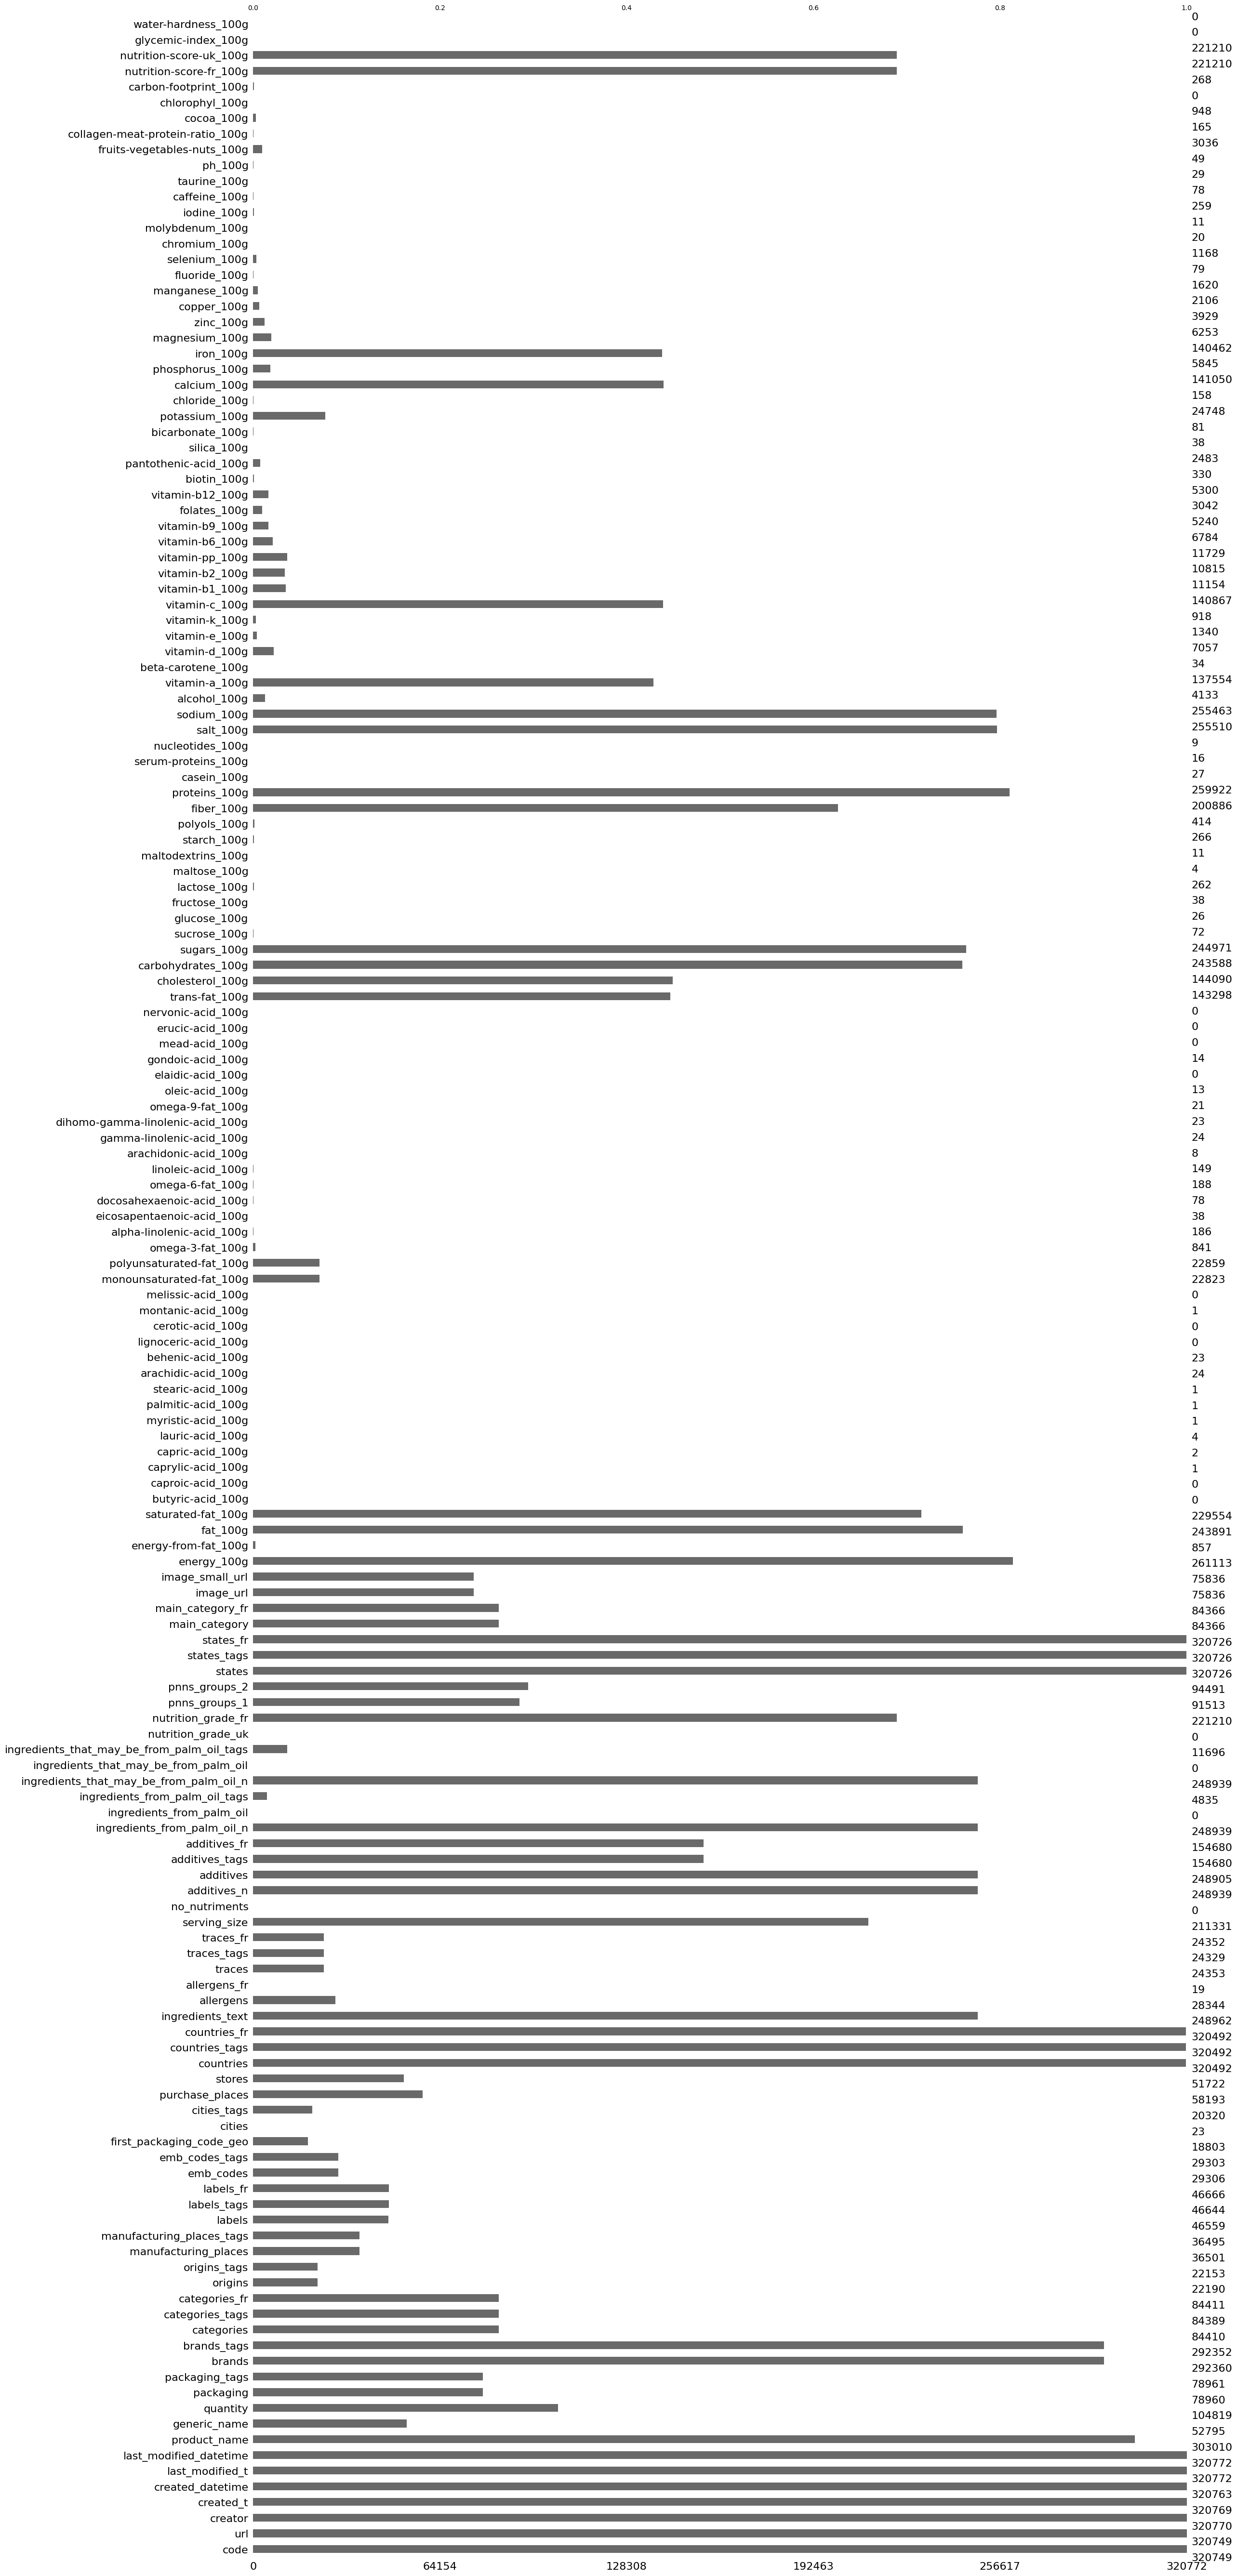

In [6]:
msno.bar(data)

In [7]:
#Vérification des lignes dupliquées par code
data[(data.duplicated(subset='code',keep=False))&(~data['code'].isna())].sort_values(by='code')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
9892,11778,http://world-fr.openfoodfacts.org/produit/0011...,beniben,1474489149,2016-09-21T20:19:09Z,1491142385,2017-04-02T14:13:05Z,All Butter Reduced Fat Stem Ginger Cookies,NaN,225 g,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
458,11778,http://world-fr.openfoodfacts.org/produit/0001...,gildubs,1490975915,2017-03-31T15:58:35Z,1490976772,2017-03-31T16:12:52Z,Stem Ginger Cookies,cookies au beurre à teneur réduite en matières...,225 g (10 cookies),...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
6,16117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,16117,http://world-fr.openfoodfacts.org/produit/0001...,usda-ndb-import,1489065258,2017-03-09T13:14:18Z,1489065258,2017-03-09T13:14:18Z,Colossal Olives With Jalapeno Peppers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,24600,http://world-fr.openfoodfacts.org/produit/0002...,tacinte,1435406581,2015-06-27T12:03:01Z,1435406592,2015-06-27T12:03:12Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105704,876045004026,http://world-fr.openfoodfacts.org/produit/0087...,usda-ndb-import,1489062109,2017-03-09T12:21:49Z,1489062109,2017-03-09T12:21:49Z,"Guy Fieri, Barbeque Sauce",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
115938,4711567123489,http://world-fr.openfoodfacts.org/produit/0471...,usda-ndb-import,1489142865,2017-03-10T10:47:45Z,1489142865,2017-03-10T10:47:45Z,"Dainty Food Co, Chili Sauce With Black Bean",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
268065,4711567123489,http://world-fr.openfoodfacts.org/produit/4711...,usda-ndb-import,1489097363,2017-03-09T22:09:23Z,1489097363,2017-03-09T22:09:23Z,Chile Sauce With Black Bean,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
276819,5400141350470,http://world-fr.openfoodfacts.org/produit/5400...,gauthier-de-geest,1481365048,2016-12-10T10:17:28Z,1485724198,2017-01-29T21:09:58Z,Cribbits Rice & Wheat Flakes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [8]:
#pnns_groups_1 contient les catégories les plus proches de la séparation général/fromages/boissons du calcul du nutriscore
data['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [9]:
data['countries_fr']

0             France
1         États-Unis
2         États-Unis
3         États-Unis
4         États-Unis
             ...    
320767      Roumanie
320768    États-Unis
320769         Chine
320770        France
320771    États-Unis
Name: countries_fr, Length: 320772, dtype: object

In [10]:
def filter_df(df):
    print('Filtering dataset for France and selecting columns')
    print('Initial row & columns :',df.shape)
    filter_by_country=[('France' in str(countries)) for countries in df['countries_fr']]
    wanted_cat_columns=['code','countries_fr','last_modified_datetime','product_name','pnns_groups_1']
    filter_num=['_100g' in str(col) for col in df.columns]
    data=pd.concat([df.loc[filter_by_country,wanted_cat_columns],df.loc[filter_by_country,filter_num]],axis=1)
    print('Resulting rows and columns',data.shape)
    return data

In [11]:
filtered_df=filter_df(data)


Filtering dataset for France and selecting columns
Initial row & columns : (320772, 162)
Resulting rows and columns (98440, 104)


In [12]:
def drop_empty (df) :
    print('Dropping rows without product name, with less than half numerical data per row, duplicated rows and empty columns (>25% nans)')
    print('Initial row & columns :',df.shape)
    df.dropna(subset='product_name',inplace=True)
    df.drop_duplicates(subset='code',keep='last',inplace=True)
    df.dropna(axis=1,thresh=df.shape[0]/4,inplace=True)
    df.dropna(subset=df.select_dtypes('number').columns,thresh=(df.select_dtypes('number').columns.shape[0])/2,inplace=True)
    print('Resulting rows and columns',df.shape)
    nutri_cols=['pnns_groups_1','energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g','fiber_100g','sodium_100g','fruits-vegetables-nuts_100g']
    for col in nutri_cols:
        if col not in df.columns:
            print('Check nutri-score indicators : Too many missing values for column ',col,'. Column will be dropped')
    msno.bar(df)
    plt.show()
    return df


Dropping rows without product name, with less than half numerical data per row, duplicated rows and empty columns (>25% nans)
Initial row & columns : (98440, 104)
Resulting rows and columns (62347, 16)
Check nutri-score indicators : Too many missing values for column  fruits-vegetables-nuts_100g . Column will be dropped


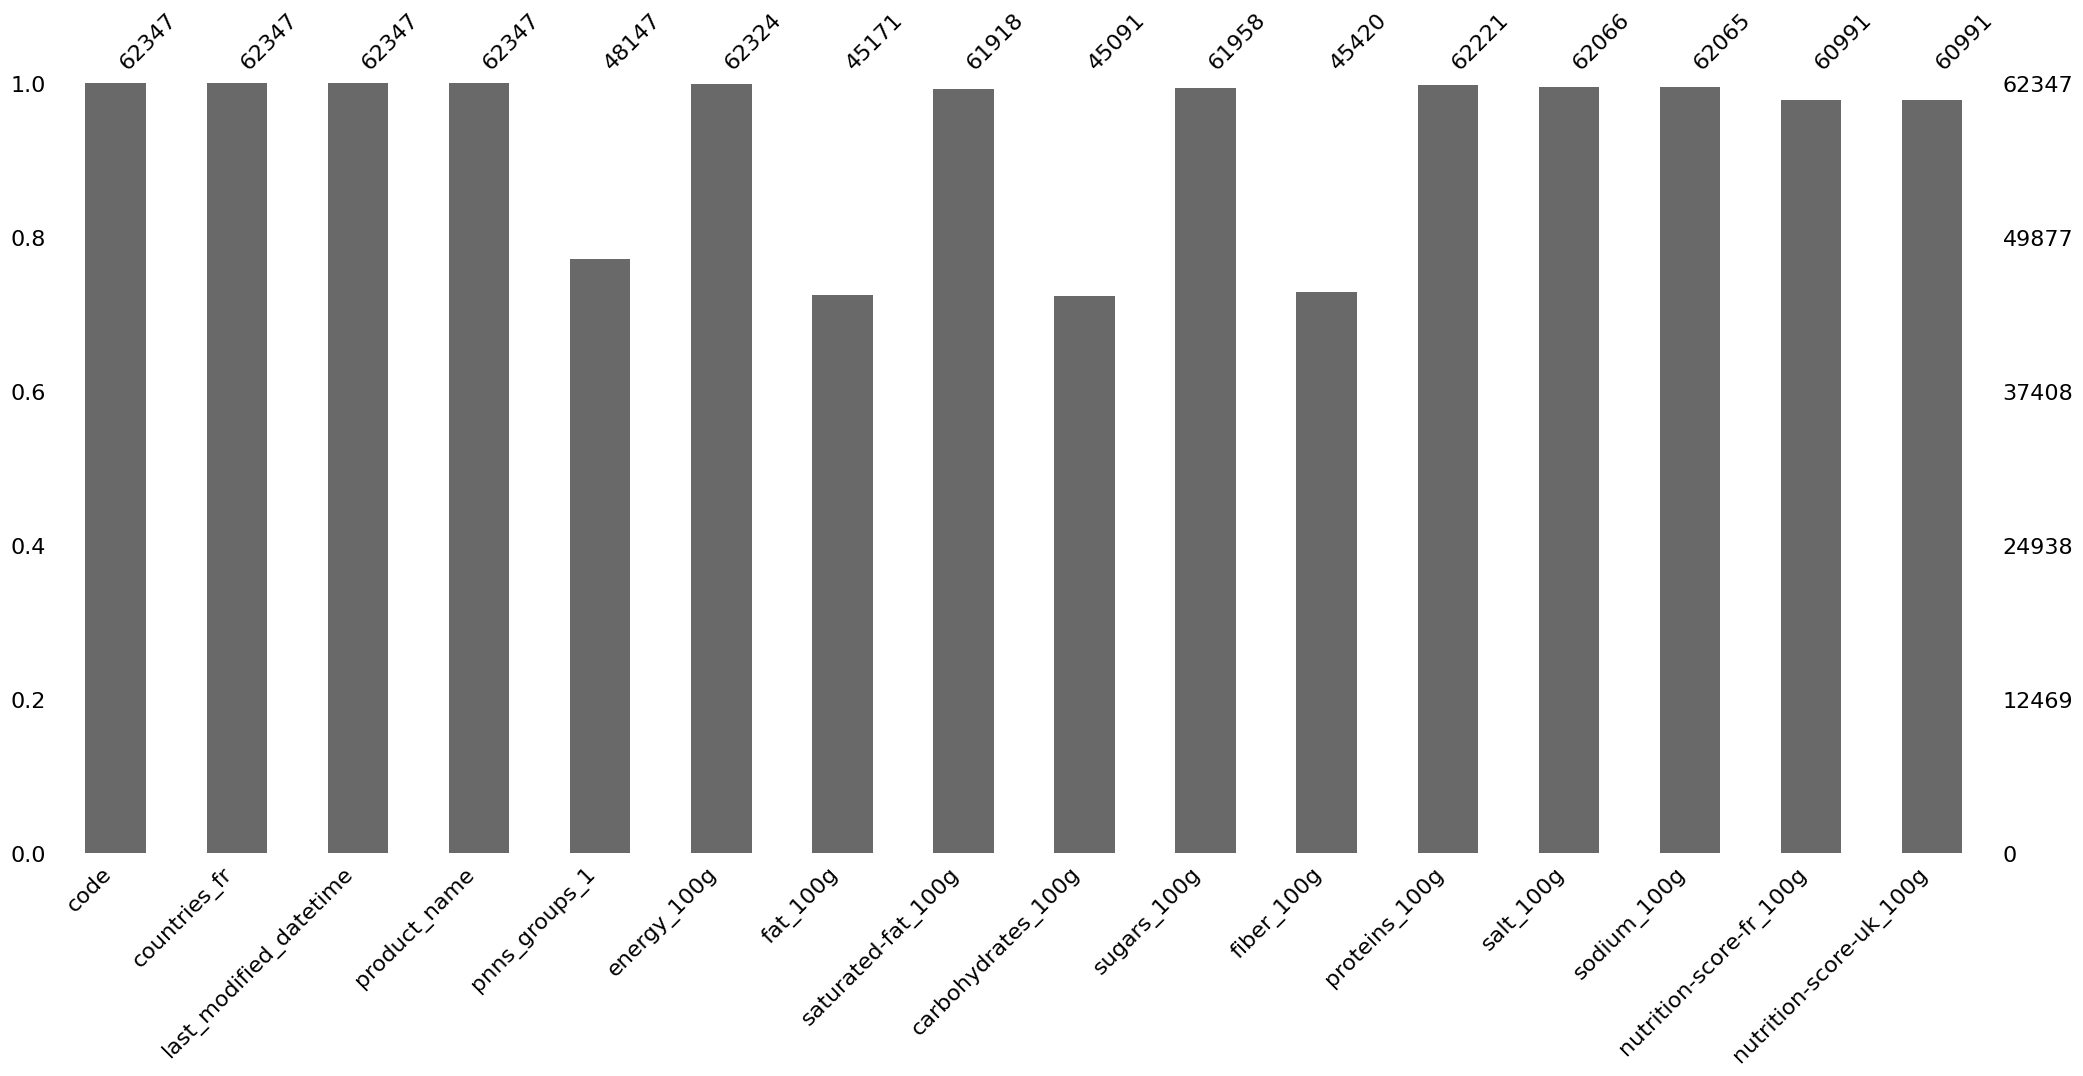

In [13]:
filtered_df=drop_empty(filtered_df)

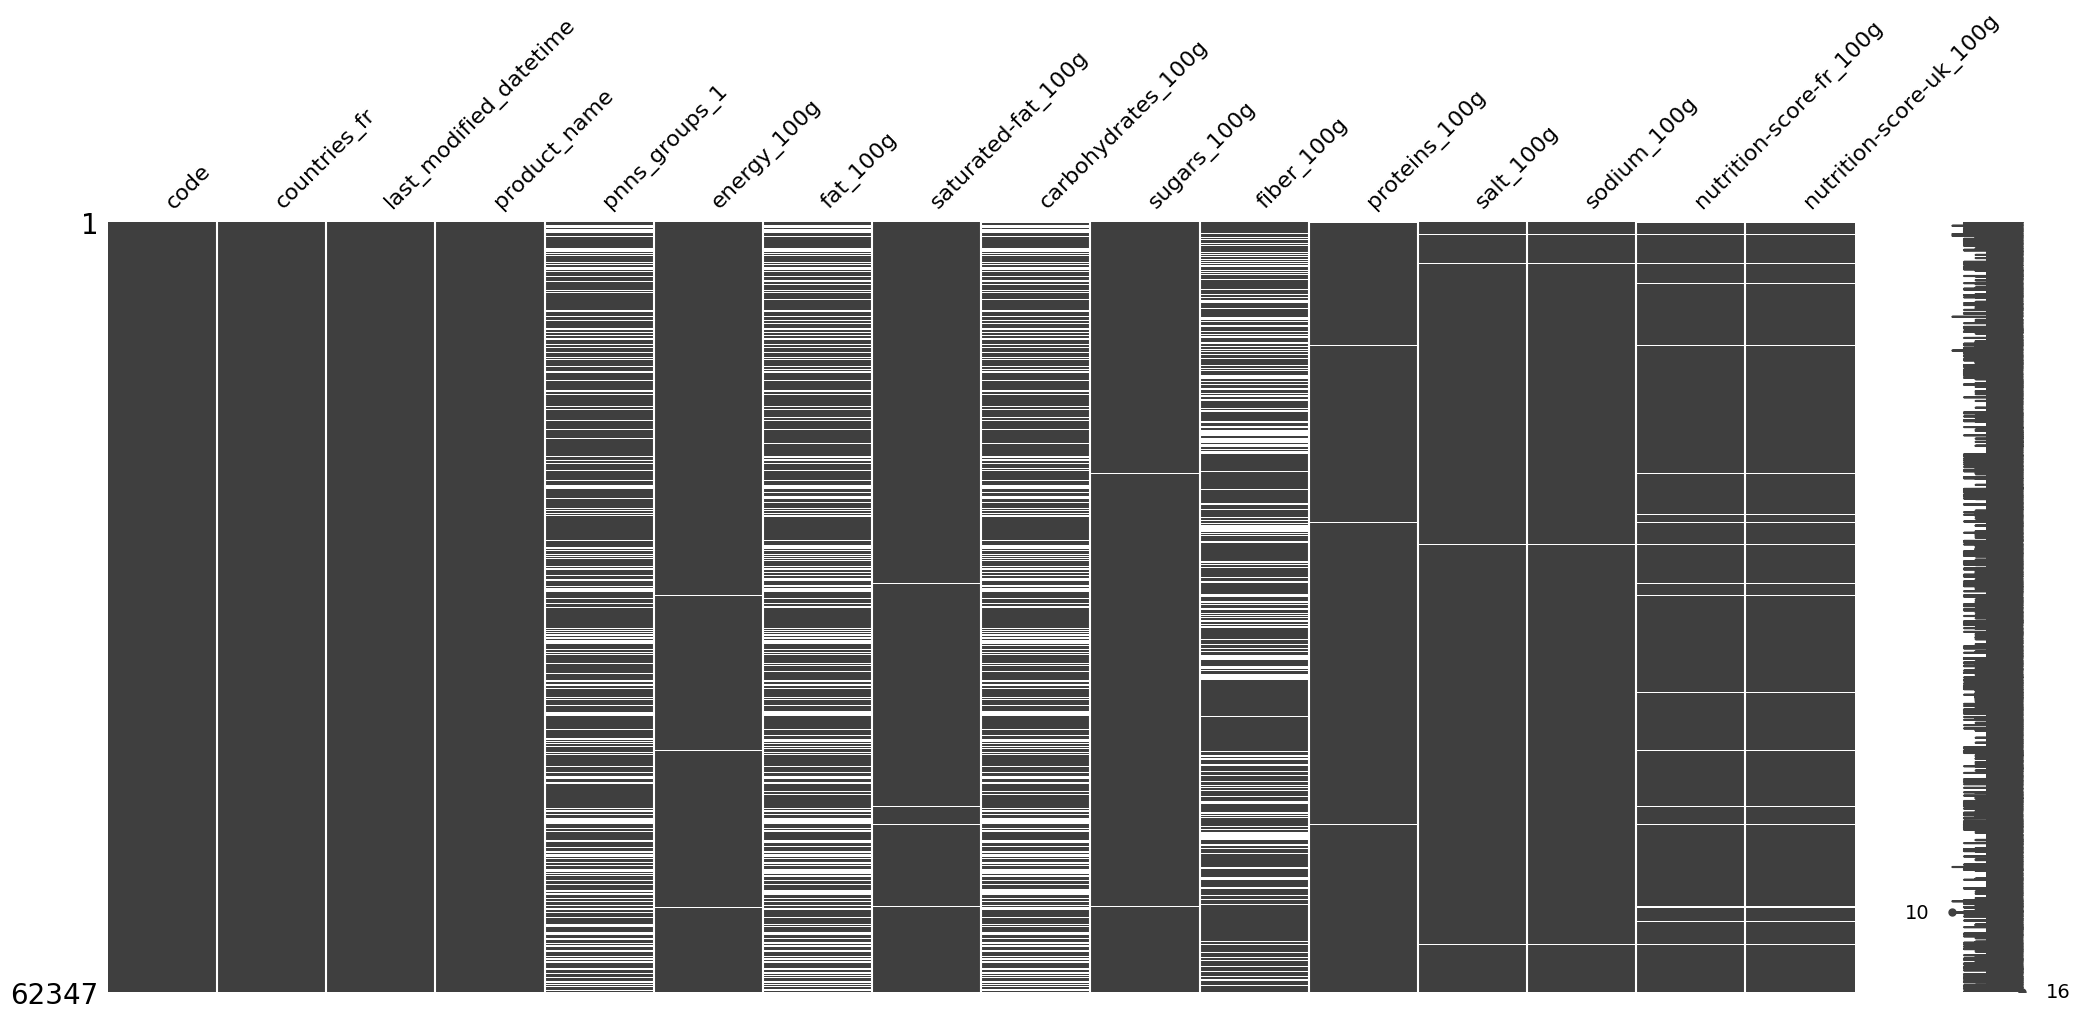

In [14]:
msno.matrix(filtered_df)
plt.show()

Les variables nécessaires au calcul du nutriscore sont : 
- type de produit : général,fromage,matières grasses ajoutées ou boisson (déductible de pnns_groups_1) 
- valeur énérgétique (energy_100g)
- matières grasses (fat_100g)
- Acides gras saturés (saturated-fat_100g)
- Sucres (sugars_100g) : Rq - Les sucres sont un type de carbohydrate
- Protéines (proteins_100g)
- Fibres (fiber_100g)
- Sel ou Sodium (salt_100g ou sodium_100g) : Rq - une formule de conversion sel vers sodium est proposée dans le calcul du nutriscore à [sodium]=[sel]*1000/2.5

(On retrouve l'ensemble des données ci-dessus dans le dataset filtré.)

- Pourcentage de fruits, légumes, légumineuses, fruits à coque, huiles de colza, de noix et d'olive (%)
Cet indicateur n'a pratiquement pas de données renseignées, il a donc été écarté.




In [15]:
filtered_df.duplicated().any()

False

### Valeurs abhérentes

#### Colonnes numériques

##### Filtre par intervalles de valeurs acceptables

In [16]:
filtered_df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,6.232400e+04,45171.000000,61918.000000,45091.000000,61958.000000,45420.000000,62221.000000,62066.000000,62065.000000,60991.000000,60991.000000
mean,1.175808e+03,13.261378,5.425670,27.767217,13.365312,2.553301,7.743641,1.156683,0.455393,8.689954,8.369022
std,1.306376e+04,16.845649,8.544089,27.309295,19.013163,4.629460,7.875162,4.263242,1.678397,9.044644,9.384282
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,4.300000e+02,1.300000,0.300000,4.100000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000000
50%,1.038000e+03,6.800000,1.980000,14.700000,4.000000,1.300000,6.000000,0.560000,0.220472,9.000000,7.000000
75%,1.653000e+03,21.000000,7.400000,53.000000,17.500000,3.200000,10.900000,1.249680,0.492000,15.000000,16.000000
max,3.251373e+06,380.000000,210.000000,190.000000,104.000000,178.000000,100.000000,211.000000,83.000000,40.000000,36.000000


La valeur d'énergie peut aller jusqu'à 900kcal soit 3780 KJ , la valeur de sodium en mg/100g, l'échelle de nutritrion score va de -15 à 40 et les autres valeurs sont en g/100g, ce qui nous donne les limites suivantes :

In [17]:
def drop_outofbounds(df):
    print('Verification des dépassements des limites de concentration pour 100g')
    #Vérification sodium
    filtre=(df['sodium_100g']>100000)|(df['sodium_100g']<0)
    if (filtre).any():
        print('Sodium : Valeurs hors limites : ',filtre.sum(),' lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)

    #Vérification nutriscores
    filtre_bas_nutriscore=df['nutrition-score-fr_100g']<-15
    filtre_haut_nutriscore=df['nutrition-score-fr_100g']>40
    filtre=filtre_bas_nutriscore|filtre_haut_nutriscore
    if (filtre).any():
        print('Nutriscore fr : Valeurs hors limites :',(filtre).sum(),'lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)
    filtre_bas_nutriscore=df['nutrition-score-uk_100g']<-15
    filtre_haut_nutriscore=df['nutrition-score-uk_100g']>40
    filtre=filtre_bas_nutriscore|filtre_haut_nutriscore
    if (filtre).any():
        print('Nutriscore uk : Valeurs hors limites :',(filtre).sum(),'lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)

    #Vérification calories
    filtre=(df['energy_100g']>3780)|(df['energy_100g']<0)
    if (filtre).any():
        print('Calories : Valeurs hors limites : ',(filtre).sum(),' lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)

    #Vérification des autres colonnes
    col_list=[col for col in df.columns if ('_100g' in str(col))&(col not in ['sodium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g','energy_100g'])]

    for col in col_list:
        filtre=(df[col]>100)|(df[col]<0)
        if (filtre).any():
            print(col,': Valeurs hors limites : ',(filtre).sum(),' lignes supprimées')
            display(df [filtre])
            df.drop(df[filtre].index,inplace=True)
    return (df)

In [18]:
#Tests pour la fonction drop_outofbounds
df_temp=filtered_df.copy()
df_temp.loc[0,'energy_100g']=-30
df_temp.loc[1,'energy_100g']=500000
df_temp.loc[3,'sodium_100g']=-30
df_temp.loc[4,'sodium_100g']=500000
df_temp.loc[5,'nutrition-score-uk_100g']=-30
df_temp.loc[6,'nutrition-score-fr_100g']=50


In [19]:
drop_outofbounds(df_temp)

Verification des dépassements des limites de concentration pour 100g
Sodium : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,NaN


Nutriscore fr : Valeurs hors limites : 1 lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN


Nutriscore uk : Valeurs hors limites : 1 lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0


Calories : Valeurs hors limites :  92  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56561,43647390011,France,2017-03-10T20:31:25Z,Tawny' Orange,NaN,5054.0,NaN,0.0,NaN,65.0,0.0,0.0,0.00,0.000000,20.0,20.0
161426,853807005163,France,2017-03-02T13:39:19Z,Huile d'avocat,NaN,3883.0,NaN,15.0,NaN,0.0,0.0,0.0,0.00,0.000000,20.0,20.0
178567,20193447,France,2017-04-08T18:48:53Z,Confiserie Firenze Apfel Streuselkuchen Tiefge...,NaN,4197.0,NaN,3.9,NaN,18.5,0.0,2.9,0.11,0.043307,17.0,17.0
178787,20233679,France,2017-04-20T07:42:28Z,Halva with Almonds,Sugary snacks,9983.0,36.8,7.8,44.2,32.0,NaN,12.9,0.00,0.000000,24.0,24.0
179179,2030502431284,France,2017-02-19T13:55:36Z,Lot De 4 Baguettes,NaN,4184.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00,0.000000,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313852,8711200595631,France,2017-04-20T17:51:02Z,Cornetto Mini X8 Fruit,NaN,5644.0,NaN,13.0,NaN,24.0,0.0,3.7,0.12,0.047244,25.0,25.0
319695,9310804500189,France,2017-03-15T10:39:08Z,Miel,NaN,5925.0,NaN,0.0,NaN,82.0,0.0,0.0,0.00,0.000000,20.0,20.0
320561,9556001171337,France,2017-04-06T05:05:27Z,Chicken Cup Of Noodles,NaN,4602.0,NaN,4.7,NaN,4.0,0.0,9.7,0.00,0.000000,14.0,14.0
0,NaN,NaN,NaN,NaN,NaN,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fat_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
305054,8032942610032,France,2017-03-17T14:09:22Z,Graine de couscous moyen,Cereals and potatoes,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0,-1.0


carbohydrates_100g : Valeurs hors limites :  4  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
155609,838619000254,France,2017-02-14T14:27:14Z,Beurre d'érable,unknown,1390.0,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN,NaN
202571,3229820787909,France,2015-04-07T17:17:55Z,Sirop d'Agave brun bio,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14,0.05510,15.0,15.0
260599,4016249015732,France,2016-11-26T09:38:10Z,Sirop d agave pur,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10,0.03937,15.0,15.0
317635,8935000901649,France,2017-03-08T21:19:58Z,Banane sèche,Fruits and vegetables,1259.0,0.0,0.0,139.0,41.5,0.0,5.0,0.00,0.00000,4.0,4.0


sugars_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
195761,3161712000928,France,2016-06-11T15:40:10Z,Caprice des dieux,Milk and dairy products,1379.0,30.0,21.0,0.8,-0.1,NaN,15.3,1.4,0.551181,15.0,20.0


fiber_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
298897,7622210988768,France,2017-04-16T19:38:10Z,Milka Schmunzelhase Alpenmilch 175G,unknown,2218.0,29.0,18.0,59.0,58.0,178.0,6.3,0.37,0.145669,22.0,22.0


salt_100g : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
232239,3423720002432,France,2017-02-01T21:21:33Z,Keeny Bio,Sugary snacks,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0,22.0
233372,3445850070259,France,2017-03-03T14:08:14Z,Sel de Guérande Label Rouge,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0,10.0


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,"France,États-Unis",2017-03-09T10:34:27Z,Lion Peanut x2,unknown,1883.0,20.0,12.50,70.0,57.50,2.5,2.50,0.09652,0.038000,22.0,22.0
190,10187319,France,2017-02-17T10:05:54Z,Mini Confettis,NaN,1753.0,NaN,0.80,NaN,87.70,0.9,0.60,0.01000,0.003937,14.0,14.0
191,10207260,France,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,2406.0,NaN,2.90,NaN,50.30,3.9,9.50,0.00300,0.001181,14.0,14.0
226,40608754,France,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Beverages,177.0,0.0,0.00,10.4,10.40,0.0,0.00,0.02540,0.010000,13.0,2.0
234,69161025,France,2017-03-22T19:59:36Z,Tarte Poireaux Et Lardons,NaN,1079.0,NaN,11.00,NaN,1.00,1.4,7.50,0.80000,0.314961,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,France,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,NaN,1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.29000,0.114173,16.0,16.0
320741,9782401029101,France,2017-04-06T19:47:01Z,Fiche Brevet,NaN,4.0,NaN,1.00,NaN,1.00,10.0,10.00,10.00000,3.937008,0.0,0.0
320751,9847548283004,France,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,Cereals and potatoes,1643.0,2.8,0.60,74.8,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0
320757,9900000000233,France,2017-04-01T20:52:19Z,Amandes,NaN,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0,0.0


In [20]:
filtered_df=drop_outofbounds(filtered_df)

Verification des dépassements des limites de concentration pour 100g
Calories : Valeurs hors limites :  90  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56561,43647390011,France,2017-03-10T20:31:25Z,Tawny' Orange,NaN,5054.0,NaN,0.00,NaN,65.0,0.0,0.0,0.00,0.000000,20.0,20.0
161426,853807005163,France,2017-03-02T13:39:19Z,Huile d'avocat,NaN,3883.0,NaN,15.00,NaN,0.0,0.0,0.0,0.00,0.000000,20.0,20.0
178567,20193447,France,2017-04-08T18:48:53Z,Confiserie Firenze Apfel Streuselkuchen Tiefge...,NaN,4197.0,NaN,3.90,NaN,18.5,0.0,2.9,0.11,0.043307,17.0,17.0
178787,20233679,France,2017-04-20T07:42:28Z,Halva with Almonds,Sugary snacks,9983.0,36.8,7.80,44.2,32.0,NaN,12.9,0.00,0.000000,24.0,24.0
179179,2030502431284,France,2017-02-19T13:55:36Z,Lot De 4 Baguettes,NaN,4184.0,NaN,0.00,NaN,0.0,0.0,0.0,0.00,0.000000,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304297,8016857024016,France,2017-02-23T11:28:53Z,Gnocchi E Pasta Fresca,NaN,4828.0,NaN,3.52,NaN,1.9,2.3,9.8,1.12,0.440945,14.0,14.0
305223,8034063244592,France,2017-02-25T14:49:11Z,Miel D'eucalyptus,NaN,5749.0,NaN,0.00,NaN,80.0,0.0,0.4,0.01,0.003937,20.0,20.0
313852,8711200595631,France,2017-04-20T17:51:02Z,Cornetto Mini X8 Fruit,NaN,5644.0,NaN,13.00,NaN,24.0,0.0,3.7,0.12,0.047244,25.0,25.0
319695,9310804500189,France,2017-03-15T10:39:08Z,Miel,NaN,5925.0,NaN,0.00,NaN,82.0,0.0,0.0,0.00,0.000000,20.0,20.0


fat_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
305054,8032942610032,France,2017-03-17T14:09:22Z,Graine de couscous moyen,Cereals and potatoes,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0,-1.0


carbohydrates_100g : Valeurs hors limites :  4  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
155609,838619000254,France,2017-02-14T14:27:14Z,Beurre d'érable,unknown,1390.0,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN,NaN
202571,3229820787909,France,2015-04-07T17:17:55Z,Sirop d'Agave brun bio,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14,0.05510,15.0,15.0
260599,4016249015732,France,2016-11-26T09:38:10Z,Sirop d agave pur,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10,0.03937,15.0,15.0
317635,8935000901649,France,2017-03-08T21:19:58Z,Banane sèche,Fruits and vegetables,1259.0,0.0,0.0,139.0,41.5,0.0,5.0,0.00,0.00000,4.0,4.0


sugars_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
195761,3161712000928,France,2016-06-11T15:40:10Z,Caprice des dieux,Milk and dairy products,1379.0,30.0,21.0,0.8,-0.1,NaN,15.3,1.4,0.551181,15.0,20.0


fiber_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
298897,7622210988768,France,2017-04-16T19:38:10Z,Milka Schmunzelhase Alpenmilch 175G,unknown,2218.0,29.0,18.0,59.0,58.0,178.0,6.3,0.37,0.145669,22.0,22.0


salt_100g : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
232239,3423720002432,France,2017-02-01T21:21:33Z,Keeny Bio,Sugary snacks,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0,22.0
233372,3445850070259,France,2017-03-03T14:08:14Z,Sel de Guérande Label Rouge,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0,10.0


In [21]:
filtered_df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,62225.000000,45145.000000,61819.000000,45065.000000,61859.000000,45329.000000,62122.000000,61968.000000,61967.000000,60894.000000,60894.000000
mean,1114.614757,13.248471,5.421195,27.749217,13.348299,2.547554,7.742482,1.150421,0.452929,8.674730,8.352843
std,773.102158,16.747629,8.500720,27.280105,18.988248,4.537320,7.873220,4.149898,1.633829,9.039314,9.378719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,430.000000,1.300000,0.300000,4.100000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000000
50%,1036.000000,6.800000,1.950000,14.700000,4.000000,1.310000,6.000000,0.560000,0.220472,9.000000,7.000000
75%,1652.000000,21.000000,7.400000,53.000000,17.500000,3.200000,10.900000,1.244600,0.490000,15.000000,16.000000
max,3774.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,40.000000,36.000000


##### Filtre par vérification de la cohérence entre variables

Sodium vs sel

In [22]:
incoherences_sodium=filtered_df[((filtered_df['salt_100g']*1000/2.5).round(0)-(filtered_df['sodium_100g']))>1][['salt_100g','sodium_100g']]
incoherences_sodium['sodium_estimé']=incoherences_sodium['salt_100g']*1000/2.5
incoherences_sodium

,salt_100g,sodium_100g,sodium_estimé
106,0.09652,0.038000,38.608
190,0.01000,0.003937,4.000
226,0.02540,0.010000,10.160
234,0.80000,0.314961,320.000
240,0.10000,0.039370,40.000
...,...,...,...
320740,0.29000,0.114173,116.000
320741,10.00000,3.937008,4000.000
320751,0.68000,0.267717,272.000
320757,0.10000,0.039370,40.000


In [23]:
#Il a l'air de s'agir majoritairement d'erreur d'unité pour le sodium, saisi en g ald mg

In [24]:
# Ecarts entre sodium_estimé (en mg) et sodium_100g (hypothèse : saisi en g pour ceux où il y a des incohérences)
incoherences_sodium[(incoherences_sodium['sodium_estimé']/1000-incoherences_sodium['sodium_100g'])>1]

,salt_100g,sodium_100g,sodium_estimé


In [151]:
def correct_sodium_unit(df):
    filtre_sur_ecarts_sodium =((df['salt_100g']*1000/2.5).round(0)-(df['sodium_100g']))>1000
    filtre_sur_erreurs_unite = ((df['salt_100g']*1000/2.5)/1000-df['sodium_100g'])<1

    df.loc[filtre_sur_ecarts_sodium&filtre_sur_erreurs_unite,'sodium_100g']=filtered_df.loc[filtre_sur_ecarts_sodium&filtre_sur_erreurs_unite,'sodium_100g']*1000
    print('Correction des unités de sodium et suppression des lignes en anomalie')
    print('Nombre de lignes initial=',df.shape[0])
    df.drop(index=df[filtre_sur_ecarts_sodium].index,inplace=True) #Drop les lignes sur lequel il y a encore des erreurs
    print('Nombre de lignes final=',df.shape[0])
    return (df)
    

In [26]:
filtered_df=correct_sodium_unit(filtered_df)

Correcting unit and dropping anomalous rows for sodium
Initial rows= 62248
Resulting rows= 58151


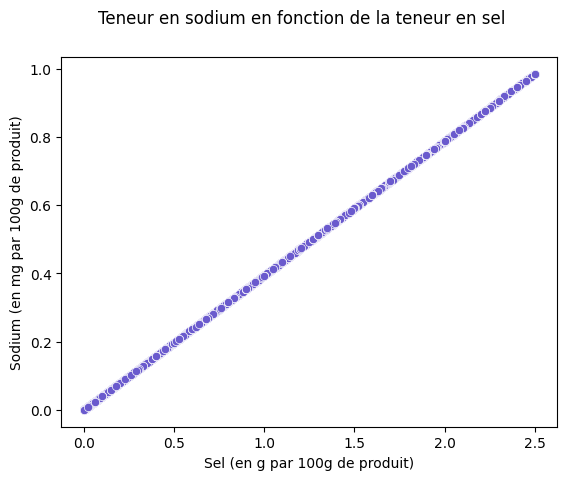

In [27]:
sns.scatterplot(x=filtered_df['salt_100g'],
              y=filtered_df['sodium_100g'],
              color='slateblue',
              )
plt.suptitle('Teneur en sodium en fonction de la teneur en sel')    
plt.xlabel('Sel (en g par 100g de produit)')      
plt.ylabel('Sodium (en mg par 100g de produit)')      
plt.show()

Carbohydrates vs sucre

In [28]:
# Sucres sont compris dans les carbohydrates :
filtered_df[(filtered_df['carbohydrates_100g']-filtered_df['sugars_100g'])<-0.9] #Marge de 0.9 prise pour les arrondis d'unité (ex carb=11.67,sug=11.7)

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
101969,84380957048,"France,États-Unis",2017-03-09T11:16:52Z,"St.dalfour, Deluxe Spread Black Cherry 225ml",NaN,870.0,0.00,0.00,50.00,52.00,1.2,0.80,0.00900,0.003543,11.0,11.0
149836,811955011016,France,2017-04-12T11:40:59Z,Alo exposed,NaN,251.0,0.00,0.00,6.25,15.00,0.0,0.00,0.03048,0.012000,3.0,3.0
177460,20043001,France,2017-03-20T22:53:18Z,"Favorina, Haselnuss Nougat Eier",NaN,2360.0,9.94,14.50,7.05,48.60,0.0,8.20,0.66040,0.260000,29.0,29.0
178305,20158125,France,2017-04-05T18:40:25Z,Fromage blanc saveur vanille,Milk and dairy products,406.0,2.20,1.50,13.00,14.00,0.0,5.40,0.08000,0.031496,2.0,2.0
179979,20455569,France,2017-03-28T19:32:58Z,Chèvre frais,Milk and dairy products,648.0,12.00,8.00,2.00,3.00,0.0,10.00,1.10000,0.433071,7.0,12.0
184952,26041254,France,2017-03-10T19:53:25Z,Compote de pêche,Fruits and vegetables,448.0,0.10,0.10,23.00,24.00,0.0,0.70,0.01000,0.003937,1.0,1.0
191595,3057640406423,"France,Suisse",2017-02-07T21:58:47Z,Volvic Limette,Beverages,205.0,0.00,0.00,4.90,12.40,0.0,0.00,0.01000,0.003937,16.0,2.0
198858,3184030003617,France,2017-04-02T09:29:06Z,L' Emmental français râpé (30 % MG),Milk and dairy products,1611.0,30.00,19.50,0.40,2.00,0.0,27.00,0.90000,0.354331,12.0,17.0
204038,3245412961984,France,2017-04-04T06:36:33Z,Carrefour - Vinaigre Balsamique de Molène,Fat and sauces,753.0,0.10,0.02,33.00,39.00,0.0,1.50,0.10000,0.039370,10.0,10.0
204893,3250390000747,France,2017-02-17T11:21:30Z,Petits pois à l'étuvée extra fins,Fruits and vegetables,418.0,0.60,0.14,20.00,22.00,5.9,7.40,0.91000,0.358268,-6.0,-6.0


In [150]:
def drop_sugar_anomalies (df):
    print('Suppression des anomalies en sucre')
    print('Nombre de lignes initial=',df.shape[0])
    ano_index=(df[(df['carbohydrates_100g']-df['sugars_100g'])<-0.9]).index
    df.drop(index=ano_index,inplace=True)
    print('Nombre de lignes final=',df.shape[0])
    return (df)

In [30]:
filtered_df=drop_sugar_anomalies (filtered_df)

Dropping anomalous rows for sugar
Initial rows= 58151
Resulting rows= 58111


In [31]:
colors = ["white", "#FFD700"]  # White for empty zones, gold for density
cmap = sns.color_palette('Accent')

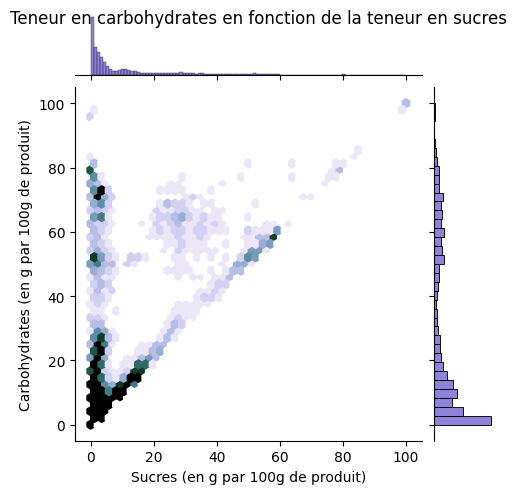

In [32]:
sns.jointplot(x=filtered_df['sugars_100g'],
              y=filtered_df['carbohydrates_100g'],
              kind="hex",
              height=5,
              color='slateblue',
              cmap=sns.cubehelix_palette(start=2, dark=-20, light=1, reverse=False, as_cmap=True))
plt.suptitle('Teneur en carbohydrates en fonction de la teneur en sucres')    
plt.xlabel('Sucres (en g par 100g de produit)')      
plt.ylabel('Carbohydrates (en g par 100g de produit)')      
plt.show()

Saturated fat vs fat

In [33]:
# Saturated fat est compris dans fat
filtered_df[(filtered_df['fat_100g']-filtered_df['saturated-fat_100g'])<-0.9]

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
176935,20003432,France,2016-11-26T08:22:03Z,Amandes en poudre,unknown,2570.0,54.8,73.8,7.0,5.50,9.4,20.50,0.07000,0.027559,13.0,13.0
197460,3175681171442,France,2017-02-27T11:32:54Z,Cuisiné Lentilles Millet et Petits légumes,unknown,678.0,2.5,6.4,34.8,16.00,7.6,6.40,0.75000,0.295276,9.0,9.0
205678,3250390491064,France,2017-03-17T15:41:08Z,Notre Ratatouille Cuisinée et ses tomates séchées,Composite foods,1544.0,4.0,12.0,7.5,2.06,0.0,1.50,2.00000,0.787402,20.0,20.0
206159,3250391072781,France,2017-02-13T21:20:10Z,Léger Doux,Fat and sauces,878.0,20.0,23.0,8.1,2.50,NaN,0.50,0.50000,0.196850,14.0,14.0
209571,3256220275347,France,2017-03-05T09:24:13Z,Noix de coco râpée,Fruits and vegetables,2962.0,58.0,59.0,11.8,6.90,14.0,7.40,0.09000,0.035433,5.0,5.0
214190,3261055931542,France,2017-03-29T11:55:09Z,Ravioli À la viande,Cereals and potatoes,452.0,3.7,13.4,13.4,3.70,0.0,4.60,0.00000,0.000000,11.0,11.0
217630,3265774107424,France,2017-01-16T12:52:33Z,Dessert lacté gélifié au chocolat,Milk and dairy products,464.0,2.4,4.6,20.0,19.00,NaN,2.20,0.10000,0.039370,8.0,8.0
224179,3302741597021,France,2015-12-10T13:21:03Z,Les St Jacques au Noilly & Riz Basmati cuisiné,Composite foods,690.0,7.8,8.8,16.4,1.80,1.0,6.80,0.68580,0.270000,11.0,11.0
230843,3396411221309,France,2017-02-12T10:39:08Z,Chocolat Noir Mendiant,Sugary snacks,2397.0,15.0,19.0,38.0,34.00,8.0,9.00,0.01400,0.005512,19.0,19.0
232989,3438860006646,France,2017-04-10T19:06:48Z,Choconeige,Milk and dairy products,715.0,4.3,7.7,17.0,5.83,0.0,3.55,0.00000,0.000000,8.0,8.0


In [152]:
def drop_fat_anomalies (df):
    print('Suppression des anomalies en gras')
    print('Nombre de lignes initial=',df.shape[0])
    ano_index=(filtered_df[(filtered_df['fat_100g']-filtered_df['saturated-fat_100g'])<-0.9]).index
    df.drop(index=ano_index,inplace=True)
    print('Nombre de lignes final=',df.shape[0])
    return (df)

In [35]:
filtered_df=drop_fat_anomalies(filtered_df)

Dropping anomalous rows for fat
Initial rows= 58111
Resulting rows= 58094


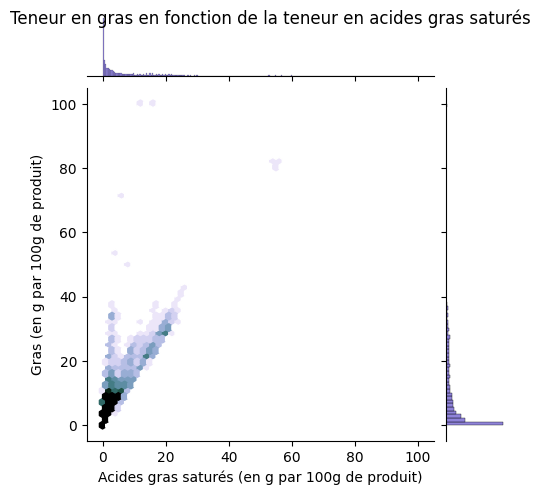

In [36]:
sns.jointplot(x=filtered_df['saturated-fat_100g'],
              y=filtered_df['fat_100g'],
              kind="hex",
              height=5,
              color='slateblue',
              cmap=sns.cubehelix_palette(start=2, dark=-20, light=1, reverse=False, as_cmap=True))
plt.suptitle('Teneur en gras en fonction de la teneur en acides gras saturés')    
plt.xlabel('Acides gras saturés (en g par 100g de produit)')      
plt.ylabel('Gras (en g par 100g de produit)')      
plt.show()

##### Vérification statistique

In [37]:
filtered_df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,58073.000000,42285.000000,57703.000000,42219.000000,57753.000000,42636.000000,57978.000000,57814.000000,57813.000000,56956.000000,56956.000000
mean,1113.434157,13.007793,5.366599,28.667066,13.914145,2.565977,7.288398,0.638546,0.251400,8.150555,7.795509
std,783.030782,16.888786,8.492778,27.364380,19.311140,4.449463,7.392425,0.645804,0.254254,8.979810,9.308821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,410.000000,1.200000,0.300000,4.800000,1.100000,0.000000,1.600000,0.052642,0.020800,1.000000,0.000000
50%,1035.000000,6.200000,1.900000,15.800000,4.500000,1.400000,5.800000,0.460000,0.181102,7.000000,5.000000
75%,1657.000000,20.700000,7.300000,54.000000,19.200000,3.300000,10.000000,1.094105,0.431000,15.000000,16.000000
max,3774.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.500130,0.984303,36.000000,36.000000


In [38]:
filter_num=['_100g' in str(col) for col in filtered_df.columns]
filtered_df.loc[:,filter_num].columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

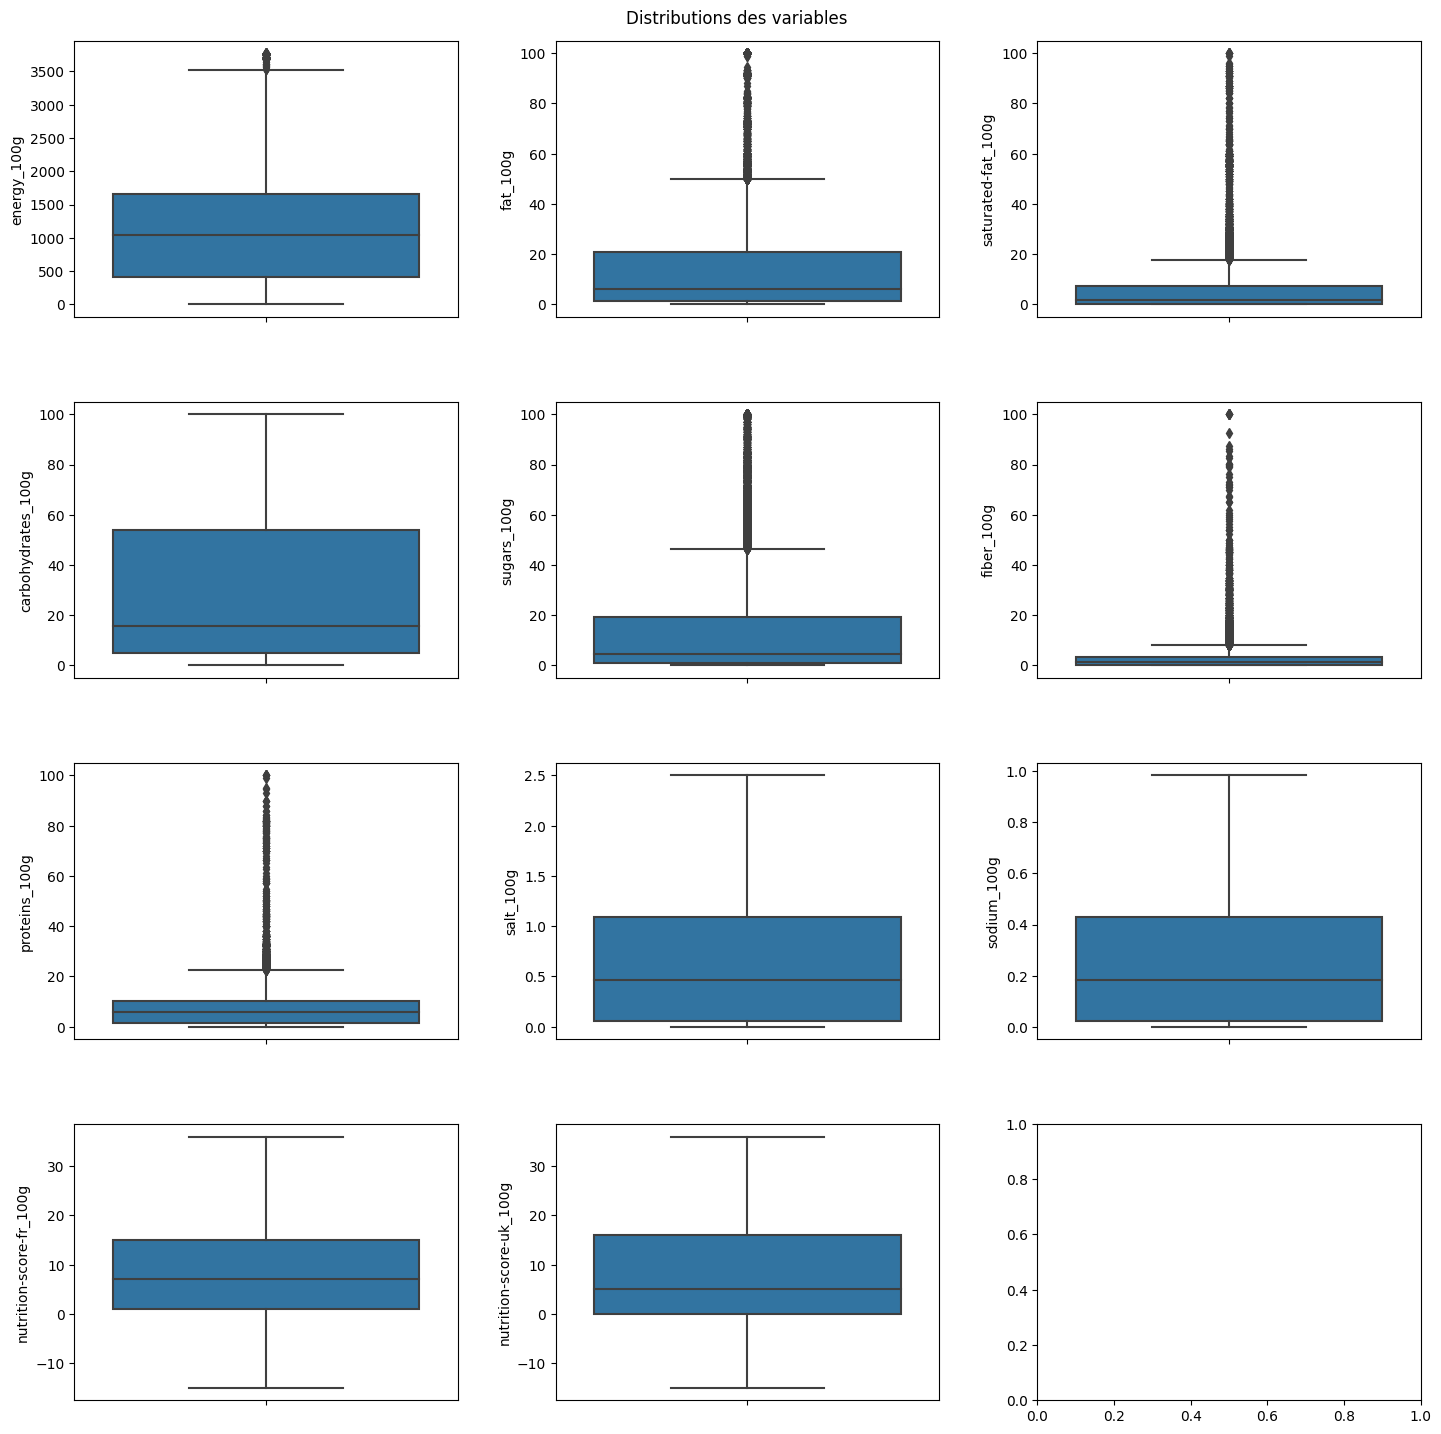

In [39]:
fig,axes=plt.subplots(-(-len(filtered_df.loc[:,filter_num].columns)//3),3,figsize=(15, 15))
fig.tight_layout(pad=4.0)
for col,ax in zip(filtered_df.loc[:,filter_num].columns,axes.ravel()):
    sns.boxplot(y=filtered_df[col],ax=ax)
plt.suptitle('Distributions des variables')
plt.show()

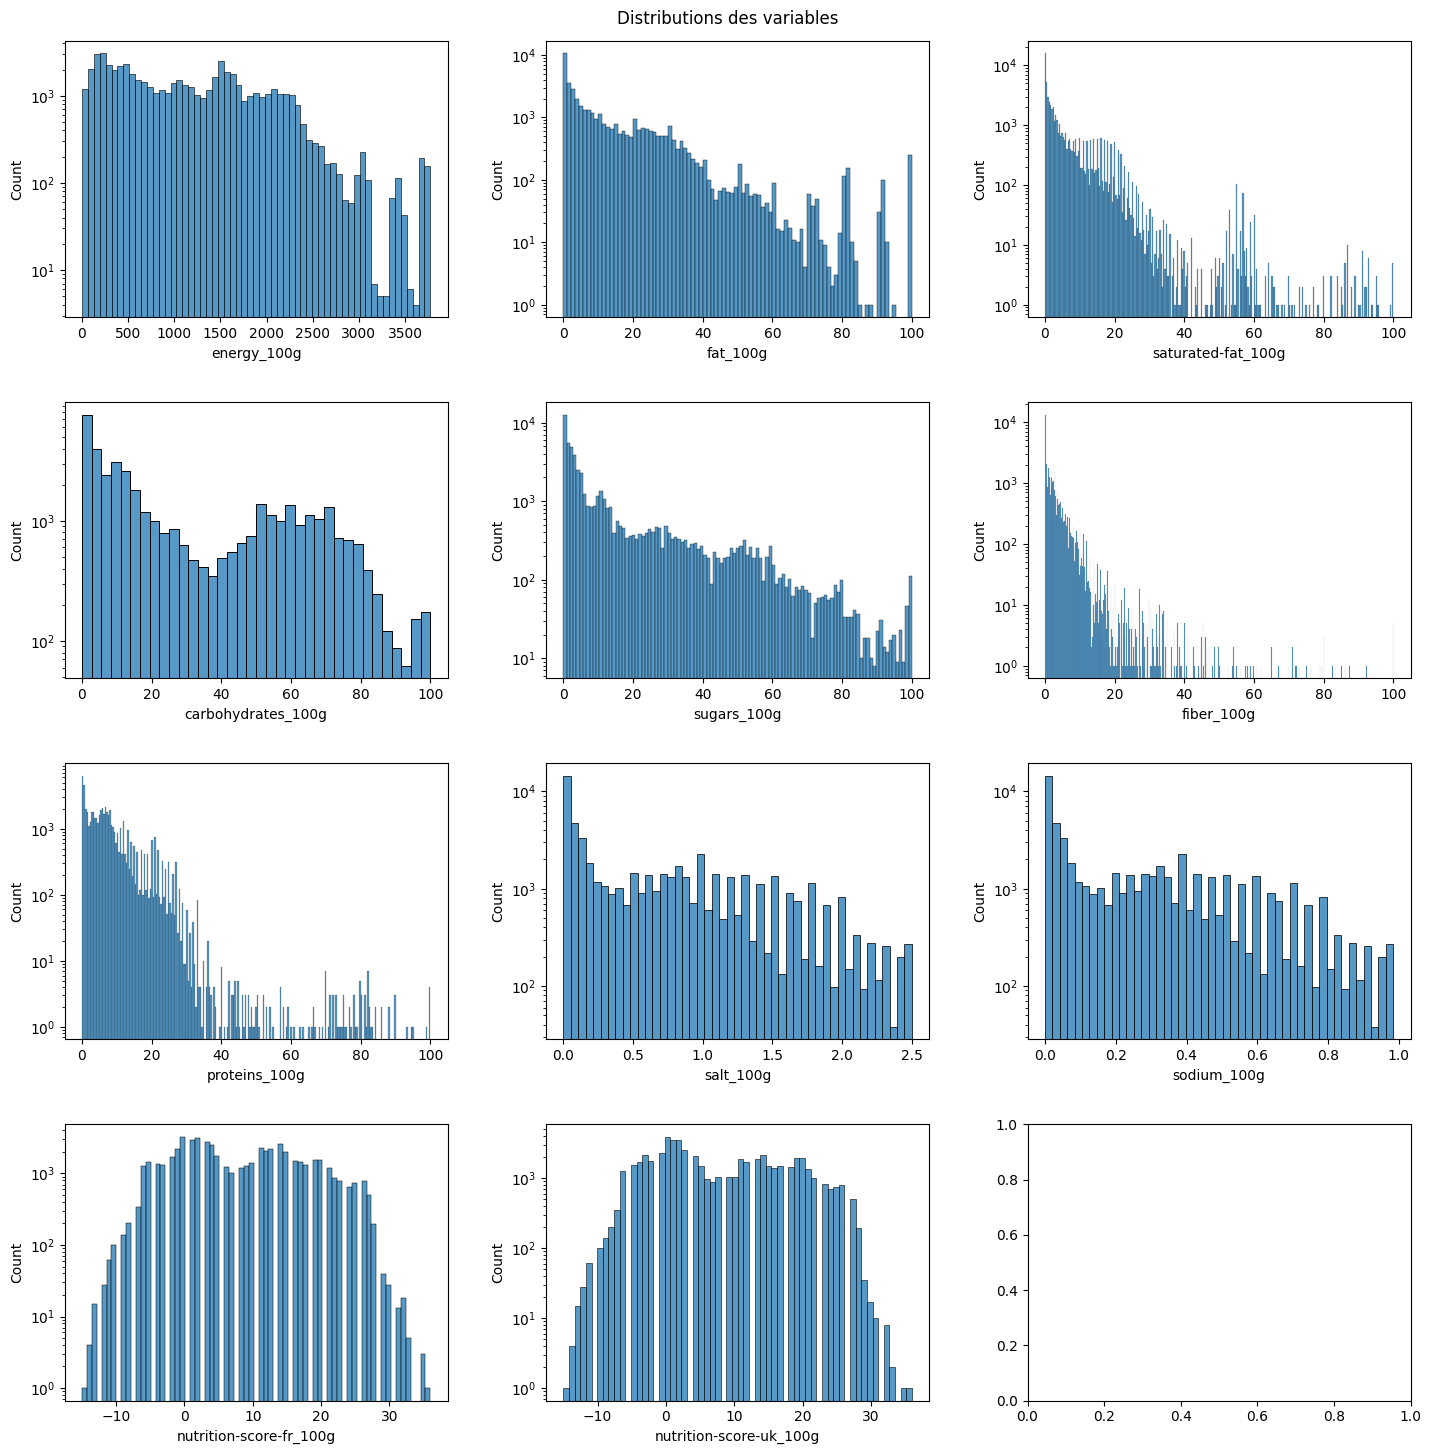

In [40]:
fig,axes=plt.subplots(-(-len(filtered_df.loc[:,filter_num].columns)//3),3,figsize=(15, 15))
fig.tight_layout(pad=4.0)
for col,ax in zip(filtered_df.loc[:,filter_num].columns,axes.ravel()):
    sns.histplot(filtered_df[col],ax=ax)
    ax.set_yscale("log")
plt.suptitle('Distributions des variables')
plt.show()

In [41]:
num_stats=filtered_df.describe().T
num_stats['IQR']=num_stats['75%']-num_stats['25%']
num_stats['high_bound']=num_stats['75%']+1.5*num_stats['IQR']
num_stats['low_bound']=num_stats['25%']-1.5*num_stats['IQR']
num_stats

,count,mean,std,min,25%,50%,75%,max,IQR,high_bound,low_bound
energy_100g,58073.0,1113.434157,783.030782,0.0,410.000000,1035.000000,1657.000000,3774.000000,1247.000000,3527.5000,-1460.500000
fat_100g,42285.0,13.007793,16.888786,0.0,1.200000,6.200000,20.700000,100.000000,19.500000,49.9500,-28.050000
saturated-fat_100g,57703.0,5.366599,8.492778,0.0,0.300000,1.900000,7.300000,100.000000,7.000000,17.8000,-10.200000
carbohydrates_100g,42219.0,28.667066,27.364380,0.0,4.800000,15.800000,54.000000,100.000000,49.200000,127.8000,-69.000000
sugars_100g,57753.0,13.914145,19.311140,0.0,1.100000,4.500000,19.200000,100.000000,18.100000,46.3500,-26.050000
fiber_100g,42636.0,2.565977,4.449463,0.0,0.000000,1.400000,3.300000,100.000000,3.300000,8.2500,-4.950000
proteins_100g,57978.0,7.288398,7.392425,0.0,1.600000,5.800000,10.000000,100.000000,8.400000,22.6000,-11.000000
salt_100g,57814.0,0.638546,0.645804,0.0,0.052642,0.460000,1.094105,2.500130,1.041464,2.6563,-1.509554
sodium_100g,57813.0,0.251400,0.254254,0.0,0.020800,0.181102,0.431000,0.984303,0.410200,1.0463,-0.594500
nutrition-score-fr_100g,56956.0,8.150555,8.979810,-15.0,1.000000,7.000000,15.000000,36.000000,14.000000,36.0000,-20.000000


Rq : Les bornes inférieures sont négatives, vu qu'il y a déjà eu un filtre sur les valeurs <0, cette contrainte n'est pas utile.

In [42]:
high_energy=filtered_df[filtered_df['energy_100g']>num_stats.loc['energy_100g','high_bound']]
high_energy

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
68125,68100083859,France,2017-03-01T01:44:08Z,Beurre D'arachide (sans Sel Ni Sucre),NaN,3766.0,NaN,10.5,NaN,10.0,10.0,30.0,0.00,0.000000,17.0,17.0
115021,3277924,France,2015-11-25T17:38:19Z,Huile d'Olive Vierge Extra Classico,Fat and sauces,3700.0,100.0,15.0,0.0,0.0,0.0,0.0,0.00,0.000000,11.0,20.0
115370,411015621416,France,2015-11-23T15:08:17Z,extra virgin cocos,Fat and sauces,3768.0,100.0,92.1,0.0,0.0,0.0,0.0,0.00,0.000000,15.0,15.0
177219,20022082,France,2017-03-14T13:27:42Z,Frites & Fritures,Fat and sauces,3700.0,100.0,100.0,0.0,0.0,NaN,0.0,0.00,0.000000,20.0,20.0
183497,2403050087317,France,2017-03-18T18:55:47Z,Supreme Loin,NaN,3636.0,NaN,2.6,NaN,0.1,0.0,20.9,0.10,0.039370,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313907,8711521900299,France,2017-03-27T10:05:10Z,Kokosolie Extra Virgin,Fat and sauces,3760.0,100.0,91.0,0.0,0.0,0.0,0.0,0.00,0.000000,15.0,15.0
314246,8712100714443,France,2017-03-08T17:37:13Z,Beurre A Cuir,NaN,3582.0,NaN,22.0,NaN,0.5,0.0,0.5,0.02,0.007874,20.0,20.0
315860,8719153009892,France,2017-01-19T14:58:03Z,Huile de coco inodore - BioWise - 400 g,Fat and sauces,3766.0,100.0,86.0,0.0,0.0,0.0,0.0,0.00,0.000000,15.0,15.0
316993,8851613003276,France,2017-03-14T07:23:14Z,virgin coconut oil,NaN,3766.0,NaN,94.0,NaN,0.0,0.0,0.0,0.00,0.000000,20.0,20.0


In [43]:
high_energy['pnns_groups_1'].unique()

array([nan, 'Fat and sauces', 'Sugary snacks', 'Salty snacks',
       'Cereals and potatoes', 'unknown'], dtype=object)

In [44]:
high_energy['product_name'].unique()

array(["Beurre D'arachide (sans Sel Ni Sucre)",
       "Huile d'Olive Vierge Extra Classico", 'extra virgin cocos',
       'Frites & Fritures', 'Supreme Loin', "Jog'Frit",
       'Huile de tournesol', 'Huile de colza 1L',
       "Huile d'olive vierge extra", 'El cultivador', 'Huile de sésame ',
       'Huile de Tournesol', 'Les Schtroumpfs P!k', 'Pignon de pin',
       'Ecochard Quenelles Nature Barquette 4X120G',
       "BLLE 75CL HUILE D'OLIVE SELECTION FRUITEE PUGET",
       'Saindoux pur porc', 'Graisse de canard',
       'Huile de pépins de raisin', 'Lesieur Huile Pepin Raisi',
       'Huile de Noix', 'Huile Pizza - pimentée', 'Huile de colza',
       "Casino Huile d'olive",
       "Huile d'olive vierge extra, extraite à froid",
       'Huile de pépins de raisins', 'Huile de noisette',
       'Huile Vierge De Colza', 'Huile de sésame toasté',
       'Huile De Pistache 250 ML - La Tourangelle',
       'La Tourangelle White Truffle Oil',
       '250ML Huile Avocat La Tourangelle', '

Les produits au dessus du seuil ont bien des valeurs caloriques élévées (ex:3700 KJ en moyenne pour une huile d'olive). Il ne s'agit pas de valeurs abhérentes.

In [45]:
len(filtered_df['pnns_groups_1'].unique())

14

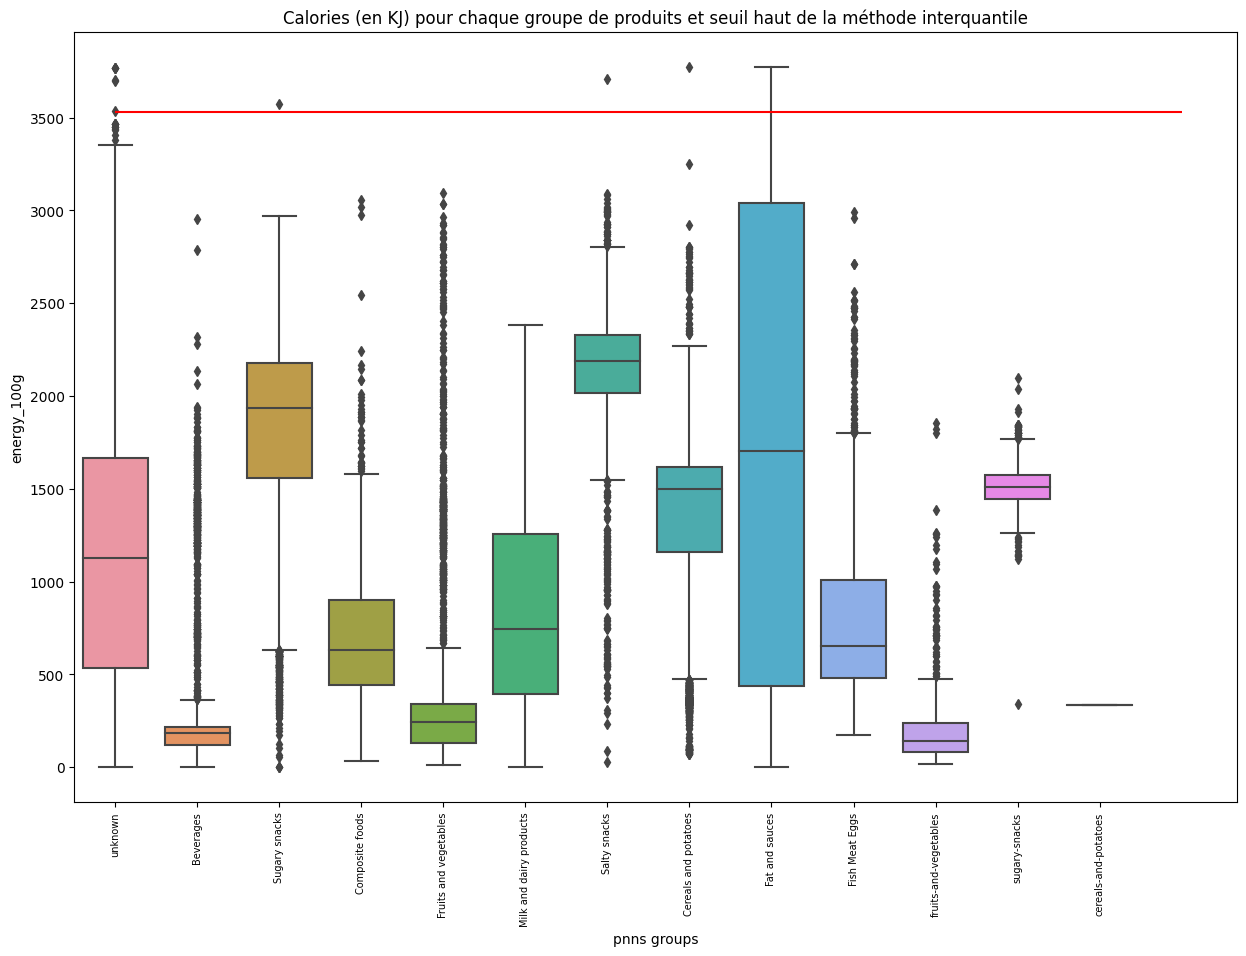

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=filtered_df,y='energy_100g',x='pnns_groups_1')
plt.xlabel('pnns groups',fontsize=10)
plt.xticks(fontsize=7, rotation=90)
plt.hlines(xmin=0,xmax=len(filtered_df['pnns_groups_1'].unique())-1,y=num_stats.loc['energy_100g','high_bound'],color='red')
plt.title('Calories (en KJ) pour chaque groupe de produits et seuil haut de la méthode interquantile')
plt.show()

In [47]:
high_fat=filtered_df[filtered_df['fat_100g']>num_stats.loc['fat_100g','high_bound']]
high_fat

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
11300,14113230025,France,2016-03-24T22:03:39Z,Almonds Amandes grillées salées,Salty snacks,2549.0,52.1,4.0,10.3,4.9,NaN,21.1,0.80000,0.314961,14.0,14.0
11303,14113230117,France,2017-01-10T12:45:36Z,Amandes Grillées Salées,Salty snacks,2577.0,52.1,4.0,10.3,4.9,NaN,21.0,0.80000,0.314961,14.0,14.0
11356,14113913782,France,2016-03-01T11:05:18Z,Walnuts,Salty snacks,2992.0,65.2,6.1,13.7,2.6,NaN,15.2,0.03000,0.011811,14.0,14.0
11779,149228,France,2017-03-04T16:10:30Z,Amandino Blanches,unknown,2536.0,55.4,5.0,4.6,NaN,NaN,22.2,0.03683,0.014500,NaN,NaN
29113,34000400126,France,2017-03-04T14:19:29Z,Beurre De Cacahuètes Crémeux,Cereals and potatoes,2481.0,50.0,8.0,21.0,9.0,0.0,25.0,1.00000,0.393701,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316233,87317756,France,2017-04-19T17:38:52Z,Mentos Mint Rol,Fat and sauces,1632.0,100.0,1.9,0.1,0.0,NaN,0.0,0.00000,0.000000,4.0,5.0
318501,9104201471001,France,2015-11-23T19:16:30Z,Fleur de sel noir,Sugary snacks,2336.0,50.0,25.0,39.0,36.0,9.0,7.1,0.50000,0.196850,20.0,20.0
320162,9339709004547,France,2017-01-21T22:28:35Z,Chocolat au caramel citron,unknown,2790.0,59.4,35.1,32.2,26.8,NaN,4.5,0.10000,0.039370,23.0,23.0
320578,9556041130943,France,2016-12-05T18:39:56Z,Huile de coco vierge,Fat and sauces,3389.0,92.0,86.0,0.0,0.0,0.0,0.0,0.00000,0.000000,15.0,15.0


In [48]:
high_fat['pnns_groups_1'].unique()

array(['Salty snacks', 'unknown', 'Cereals and potatoes', nan,
       'Sugary snacks', 'Fat and sauces', 'Fish Meat Eggs',
       'Fruits and vegetables', 'Milk and dairy products',
       'sugary-snacks', 'Composite foods'], dtype=object)

In [49]:
list(high_fat['product_name'].unique())

['Almonds Amandes grillées salées',
 'Amandes Grillées Salées',
 'Walnuts',
 'Amandino Blanches',
 'Beurre De Cacahuètes Crémeux',
 'Beurre de cacahuètes crémeux ',
 'Erdnussbutter',
 'Skippy extra-crunchy supercrunch',
 'Creamy Peanut Butter',
 'Creamy Caesar Dressing',
 'Skippy Smooth',
 "beurre d'arachide croquant",
 'Caesar Dressing',
 'Peri Peri Mayo',
 'Roasted Garlic Mayo',
 'Margarine Bio',
 "Huile d'Olive Vierge Extra Classico",
 'extra virgin cocos',
 'Crunchy Peanut Butter',
 'beurre de cacahuète creamy peanut butter',
 'Huile de coco',
 'Organic Raw Almond Butter',
 'almonds',
 'Amandes grillées pauvres en sel',
 "Huile d'olive vierge extra - Crète - 2012",
 'Mayonnaise',
 'Amandes Effilées ',
 'Pistaches de Californie grillées à sec et salées',
 'Huile de tournesol',
 'Cacahuètes grillées & salées',
 'Amandes grillées et salées ',
 'Frites & Fritures',
 "Huile d'olive",
 'Olio extra vergine di oliva 100 % Italiano',
 'Nuts Royal naturbelassen',
 "Huile d'Olive Vierge Extra

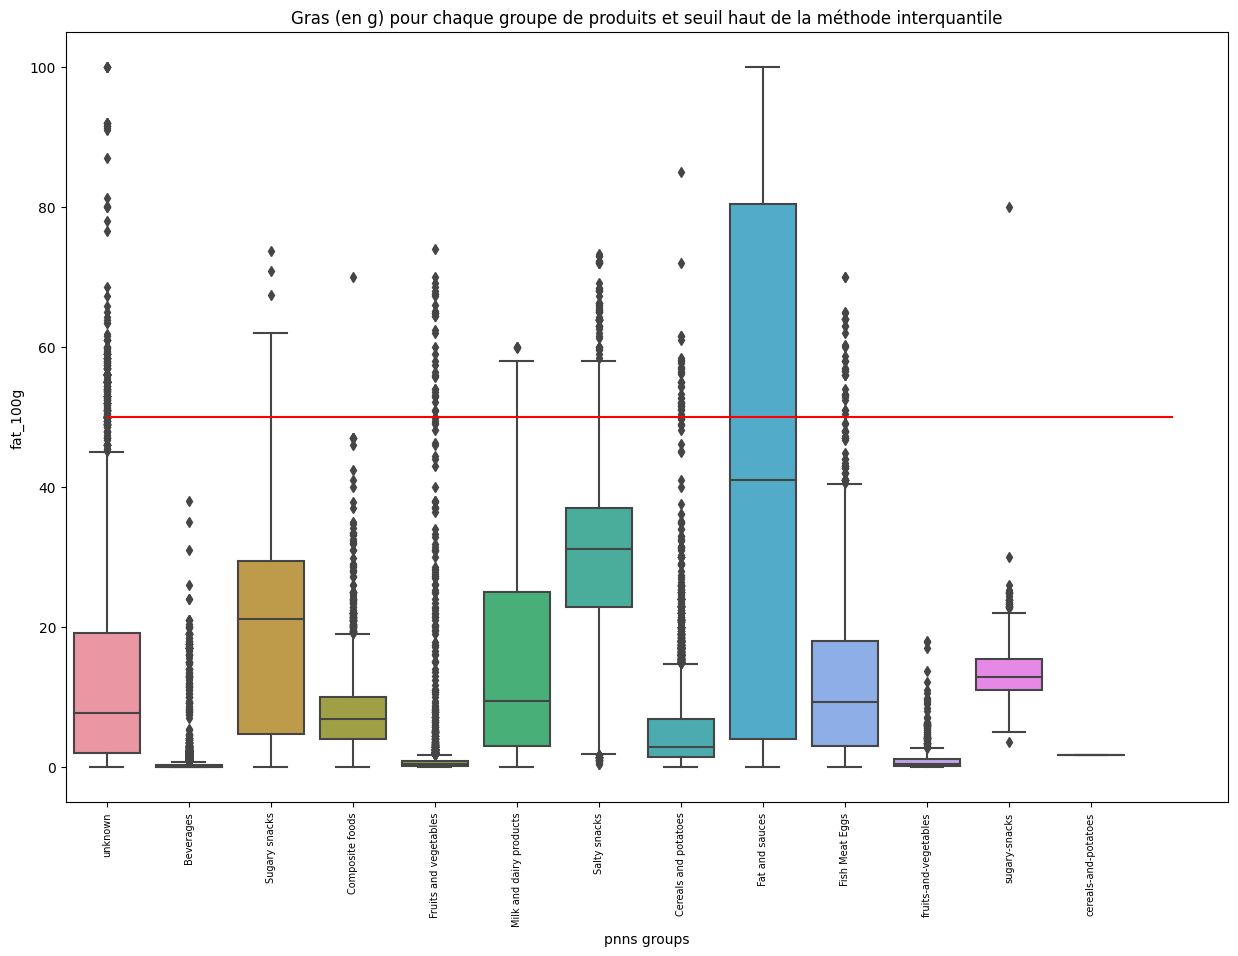

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(data=filtered_df,y='fat_100g',x='pnns_groups_1')
plt.xlabel('pnns groups',fontsize=10)
plt.xticks(fontsize=7, rotation=90)
plt.hlines(xmin=0,xmax=len(filtered_df['pnns_groups_1'].unique())-1,y=num_stats.loc['fat_100g','high_bound'],color='red')
plt.title('Gras (en g) pour chaque groupe de produits et seuil haut de la méthode interquantile')
plt.show()

In [51]:
high_fat[high_fat['pnns_groups_1']=='sugary-snacks']

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
222671,3284230005937,France,2016-02-18T08:32:53Z,6 spiralo's chocolat,sugary-snacks,1240.0,80.0,25.0,47.5,19.2,NaN,7.1,0.5,0.19685,19.0,19.0


In [52]:
high_fat[high_fat['pnns_groups_1']=='Cereals and potatoes']

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
29113,34000400126,France,2017-03-04T14:19:29Z,Beurre De Cacahuètes Crémeux,Cereals and potatoes,2481.0,50.0,8.00,21.0,9.00,0.00,25.0,1.000000,0.393701,19.0,19.0
34626,37600106009,France,2017-02-28T17:32:52Z,Beurre de cacahuètes crémeux,Cereals and potatoes,2720.0,51.6,10.00,18.8,10.90,4.70,25.3,1.130000,0.444882,18.0,18.0
34644,37600110754,"France,États-Unis",2017-03-09T14:06:29Z,Creamy Peanut Butter,Cereals and potatoes,2480.0,50.0,9.38,18.8,9.38,6.25,21.9,1.190000,0.469000,18.0,18.0
59306,48001270305,France,2017-02-28T17:32:48Z,Skippy Smooth,Cereals and potatoes,650.0,51.6,10.00,18.8,10.90,4.70,25.3,1.130000,0.444882,11.0,11.0
66899,60383860486,France,2016-09-21T16:05:46Z,beurre d'arachide croquant,Cereals and potatoes,2790.0,53.3,6.67,20.0,6.67,6.67,20.0,0.000000,0.000000,10.0,10.0
118568,613668024402,France,2016-09-15T12:24:42Z,Crunchy Peanut Butter,Cereals and potatoes,592.0,51.0,8.00,22.0,8.00,NaN,20.0,1.000000,0.393701,13.0,13.0
118569,613668024501,France,2015-09-19T15:32:16Z,beurre de cacahuète creamy peanut butter,Cereals and potatoes,2616.0,50.0,11.00,22.0,9.00,6.00,25.0,1.031240,0.406000,17.0,17.0
178240,20150631,France,2017-03-23T16:05:05Z,Beurre de cacahouète,Cereals and potatoes,2695.0,55.0,9.10,9.3,3.30,NaN,27.0,0.880000,0.346457,20.0,20.0
178614,20201494,France,2017-01-09T11:06:17Z,Graines de sésame bio,Cereals and potatoes,2483.0,50.4,7.60,10.2,0.20,11.20,20.9,0.110000,0.043307,9.0,9.0
179417,2035806599999,France,2015-10-04T08:37:12Z,Beurre de cacahuètes,Cereals and potatoes,2745.0,57.7,9.80,14.5,6.90,5.50,18.9,0.700000,0.275591,16.0,16.0


Rq: Dans céréales et patates, qui d'après le nom semblerait être un groupe à faible teneur en gras, on retrouve du beurre de cacahuète et du tahin à forte teneur en gras. Ces valeurs ne sont pas abhérentes.

In [53]:
high_sugar=filtered_df[filtered_df['sugars_100g']>num_stats.loc['sugars_100g','high_bound']]
high_sugar

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,"France,États-Unis",2017-03-09T10:34:27Z,Lion Peanut x2,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.50,0.09652,0.038000,22.0,22.0
190,10187319,France,2017-02-17T10:05:54Z,Mini Confettis,NaN,1753.0,NaN,0.8,NaN,87.7,0.9,0.60,0.01000,0.003937,14.0,14.0
191,10207260,France,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,2406.0,NaN,2.9,NaN,50.3,3.9,9.50,0.00300,0.001181,14.0,14.0
452,11501,"France,Royaume-Uni",2016-11-23T14:44:16Z,Curiously Strong Mints,unknown,1665.0,0.5,0.5,96.0,96.0,0.1,0.90,0.00000,0.000000,14.0,14.0
1343,9800892204,"Canada,France,Suisse,États-Unis",2017-01-12T15:10:15Z,Nutella,Sugary snacks,2260.0,32.4,10.8,56.8,56.8,2.7,5.41,0.10300,0.040500,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320301,93682961,France,2017-02-09T12:34:59Z,M & m Chocolate M & M 40 GR,NaN,2004.0,NaN,11.1,NaN,65.7,0.0,4.80,0.07000,0.027559,25.0,25.0
320343,9400550646276,France,2017-04-10T08:33:25Z,Pascall Family Pack Sweets Fruit Bursts,NaN,1427.0,NaN,1.0,NaN,55.5,0.0,1.00,0.00000,0.000000,14.0,14.0
320450,9421023620883,France,2017-03-29T09:49:40Z,Miel De Manuka MGO 400+ - 250G - Manuka Health,NaN,1377.0,NaN,0.0,NaN,82.1,0.0,0.30,0.01400,0.005512,14.0,14.0
320611,9556041612661,France,2015-12-08T09:01:04Z,Sauce Pour Nems,Fat and sauces,1075.0,0.4,0.0,66.0,61.0,0.0,0.50,1.81610,0.715000,20.0,20.0


In [54]:
list(high_sugar['product_name'].unique())

['Lion Peanut x2',
 'Mini Confettis',
 'Praliné Amande Et Noisette',
 'Curiously Strong Mints',
 'Nutella',
 'Mini Crêpes ChocoLait',
 'Ginger candy',
 'C&H Cane Sugar',
 'Brins de ChocoCaramel',
 'Mini Snack Raisins',
 'Wild Berry Skittles',
 "Crème de marrons de l'Ardèche",
 "Crème de Marrons de l'Ardèche",
 "crème de marron de l'ardèche vanillée",
 'Paskesz Sour Belts 4X4 4 Oz',
 'Kosher Candy',
 'Sour Stick Framboise',
 'Craisins, Dried Cranberries, Original',
 'Ocean Spray Craisins Pomegranate',
 'Oat And Barley Porridge',
 'Gluten Free Christmas Pudding',
 'Cups Saveur Chocolat Au Lait Et Beurre De Cacahuètes',
 "Reese's Pieces",
 "Reese's Pieces 113G",
 'Syrup Chocolate Flavor',
 "Reese's Cups Hershey's",
 'Peanut butter cups',
 'Hersheys Reeses Peanut Butter Cups 4 Pack',
 "Reese's Peanut Butter Cups Miniatures, 40 Oz",
 'Peanut Butter Cups Miniatures',
 'Peanut Butter Cups Minis',
 "Milk Chocolate Reese's Peanut Butter",
 "Reese's Peanut Butter Snowmen",
 'Lindt Swiss Thins',


On retrouve à nouveau des produits avec des valeurs de teneur en sucre réellement élévées (ex: miel,confiseries)

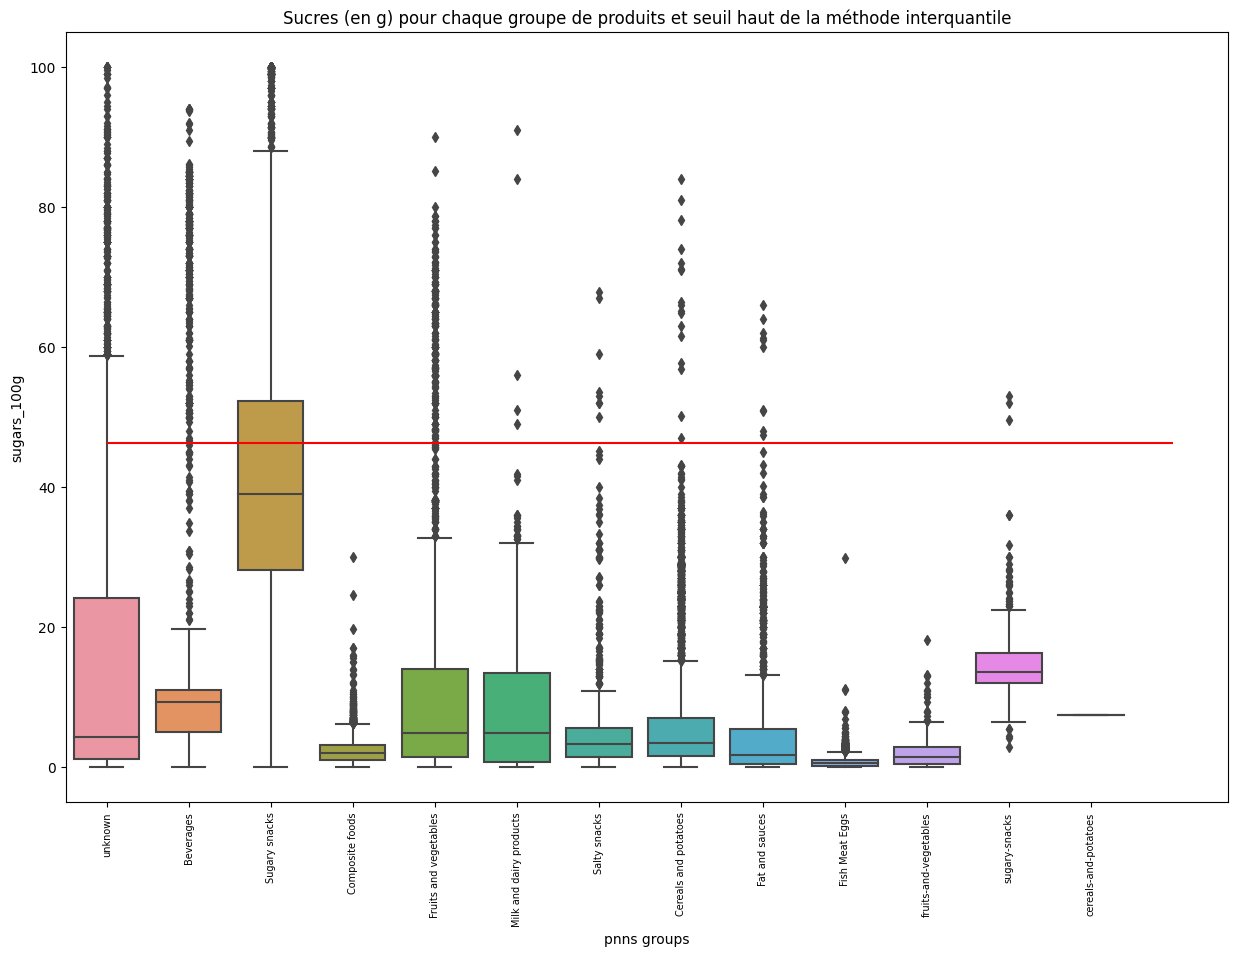

In [55]:
plt.figure(figsize=(15,10))
sns.boxplot(data=filtered_df,y='sugars_100g',x='pnns_groups_1')
plt.xlabel('pnns groups',fontsize=10)
plt.xticks(fontsize=7, rotation=90)
plt.hlines(xmin=0,xmax=len(filtered_df['pnns_groups_1'].unique())-1,y=num_stats.loc['sugars_100g','high_bound'],color='red')
plt.title('Sucres (en g) pour chaque groupe de produits et seuil haut de la méthode interquantile')
plt.show()

Compte tenu de la vraisemblance des données observées, celles-ci ne peuvent être considérées comme abhérentes, la méthode de filtrage des données d'après une vérification statistique ne sera donc pas appliquée.

#### Colonnes catégorielles

In [56]:
filtered_df.loc[:,(filtered_df.dtypes==object).to_list()]

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1
106,36252,"France,États-Unis",2017-03-09T10:34:27Z,Lion Peanut x2,unknown
190,10187319,France,2017-02-17T10:05:54Z,Mini Confettis,NaN
191,10207260,France,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN
226,40608754,France,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Beverages
234,69161025,France,2017-03-22T19:59:36Z,Tarte Poireaux Et Lardons,NaN
...,...,...,...,...,...
320734,9778564312457,"France,Royaume-Uni",2017-04-02T15:15:34Z,Nature cheddar and red onion crisps,Salty snacks
320740,9782211109758,France,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,NaN
320751,9847548283004,France,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,Cereals and potatoes
320757,9900000000233,France,2017-04-01T20:52:19Z,Amandes,NaN


In [57]:
filtered_df.loc[:,(filtered_df.dtypes==object).to_list()].describe()

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1
count,58094,58094,58094,58094,45065
unique,58094,234,56646,48777,13
top,36252,France,2017-04-20T17:49:45Z,Huile d'olive vierge extra,Sugary snacks
freq,1,55296,8,43,7420


In [58]:
filtered_df['pnns_groups_1'].unique()

array(['unknown', nan, 'Beverages', 'Sugary snacks', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Cereals and potatoes', 'Fat and sauces', 'Fish Meat Eggs',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

In [59]:
def replace_labels(df):
    print('Correcting labels for pnns_groups_1 :')
    print('Initial labels :',df['pnns_groups_1'].unique())
    df['pnns_groups_1'].replace(to_replace='fruits-and-vegetables', value='Fruits and vegetables',inplace=True)
    df['pnns_groups_1'].replace(to_replace='sugary-snacks', value='Sugary snacks',inplace=True)
    df['pnns_groups_1'].replace(to_replace='cereals-and-potatoes', value='Cereals and potatoes',inplace=True)
    print('Corrected labels :',df['pnns_groups_1'].unique())
    return df

In [60]:
filtered_df=replace_labels(filtered_df)

Correcting labels for pnns_groups_1 :
Initial labels : ['unknown' nan 'Beverages' 'Sugary snacks' 'Composite foods'
 'Fruits and vegetables' 'Milk and dairy products' 'Salty snacks'
 'Cereals and potatoes' 'Fat and sauces' 'Fish Meat Eggs'
 'fruits-and-vegetables' 'sugary-snacks' 'cereals-and-potatoes']
Corrected labels : ['unknown' nan 'Beverages' 'Sugary snacks' 'Composite foods'
 'Fruits and vegetables' 'Milk and dairy products' 'Salty snacks'
 'Cereals and potatoes' 'Fat and sauces' 'Fish Meat Eggs']


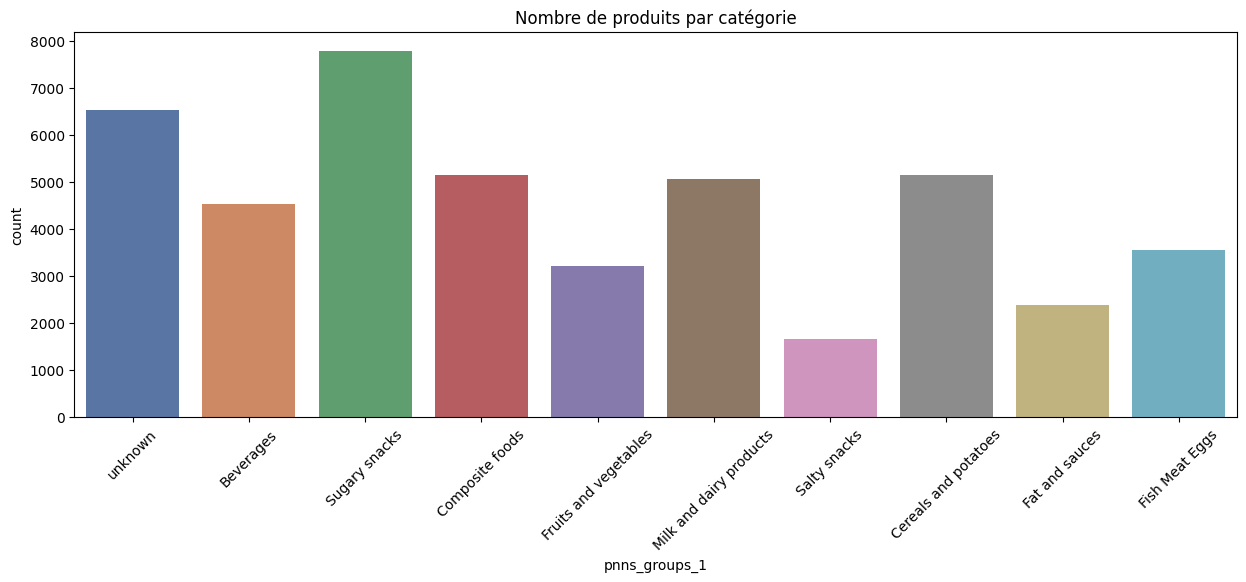

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x=filtered_df['pnns_groups_1'],palette='deep')
plt.xticks(size=10,rotation=45)
plt.title('Nombre de produits par catégorie')
plt.show()

In [62]:
#Vérification de la cohérence des dates
filtered_df['last_modified_datetime']=pd.to_datetime(filtered_df['last_modified_datetime'])

filtered_df['last_modified_datetime'].describe()

count                                  58094
mean     2016-08-12 07:07:45.748286976+00:00
min                2012-04-08 08:12:35+00:00
25%                2016-02-13 18:09:16+00:00
50%         2017-01-11 14:16:15.500000+00:00
75%         2017-03-11 18:08:49.500000+00:00
max                2017-04-21 00:53:41+00:00
Name: last_modified_datetime, dtype: object

### Imputation des données

<Axes: >

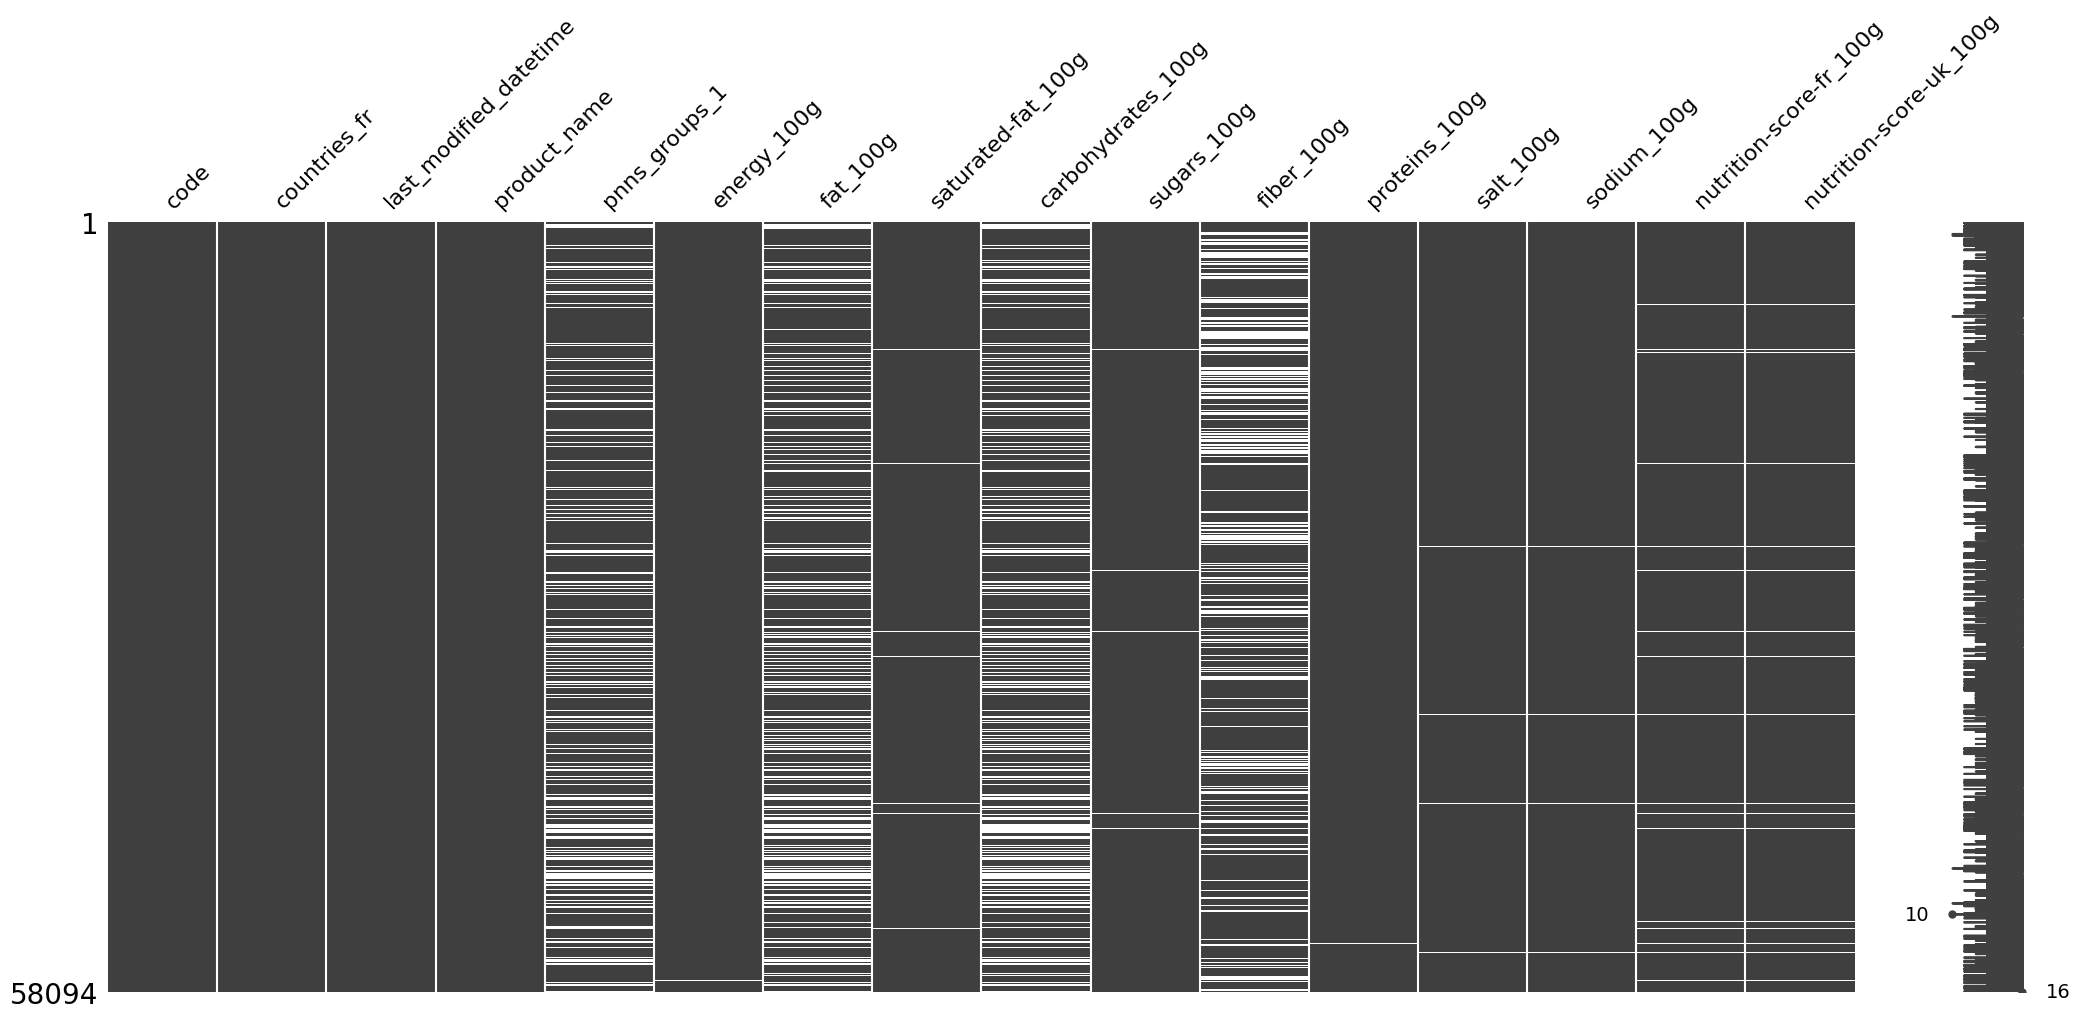

In [63]:
msno.matrix(filtered_df)

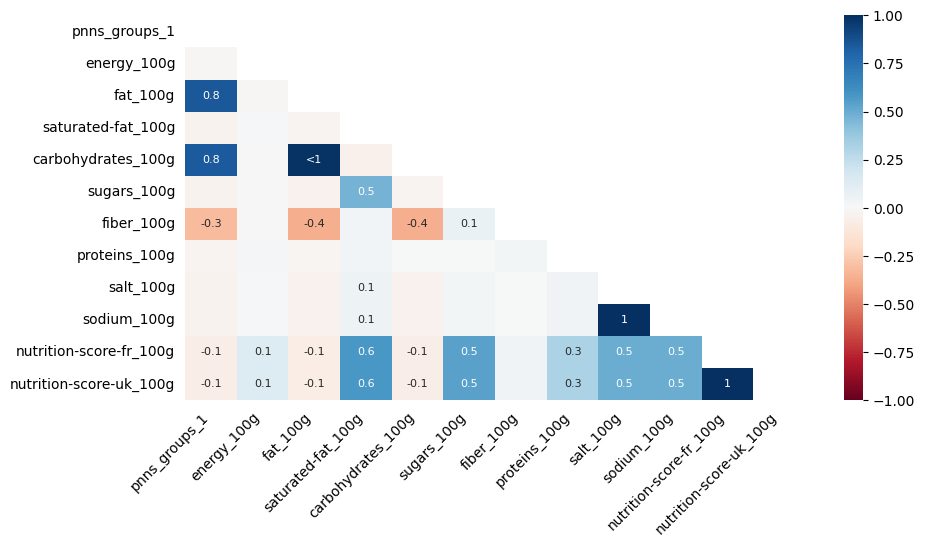

In [64]:
msno.heatmap(filtered_df,figsize=(10,5),fontsize=10)
plt.show()

#### Création d'un dataframe pour tester les imputers

In [65]:
complete=filtered_df.iloc[:,filter_num].dropna(axis=0)
columns=complete.columns
index=complete.index
complete

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,1883.0,20.0,12.50,70.00,57.50,2.500,2.500,0.09652,0.038000,22.0,22.0
226,177.0,0.0,0.00,10.40,10.40,0.000,0.000,0.02540,0.010000,13.0,2.0
242,1900.0,23.0,2.50,55.00,26.00,1.500,6.000,0.66000,0.259843,12.0,12.0
279,1768.0,19.0,2.50,56.00,28.00,1.800,5.800,0.65000,0.255906,13.0,13.0
283,1670.0,15.0,2.00,60.00,34.00,1.500,4.900,0.60000,0.236220,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
320670,1568.0,2.1,1.20,79.00,68.00,6.400,5.700,0.06000,0.023622,10.0,10.0
320681,1017.0,1.3,1.28,95.87,0.12,0.005,0.040,0.00500,0.001969,4.0,4.0
320702,1031.0,1.3,1.28,95.31,0.10,1.470,0.004,0.00100,0.000394,2.0,2.0
320751,1643.0,2.8,0.60,74.80,2.60,5.900,13.000,0.68000,0.267717,-4.0,-4.0


<Axes: >

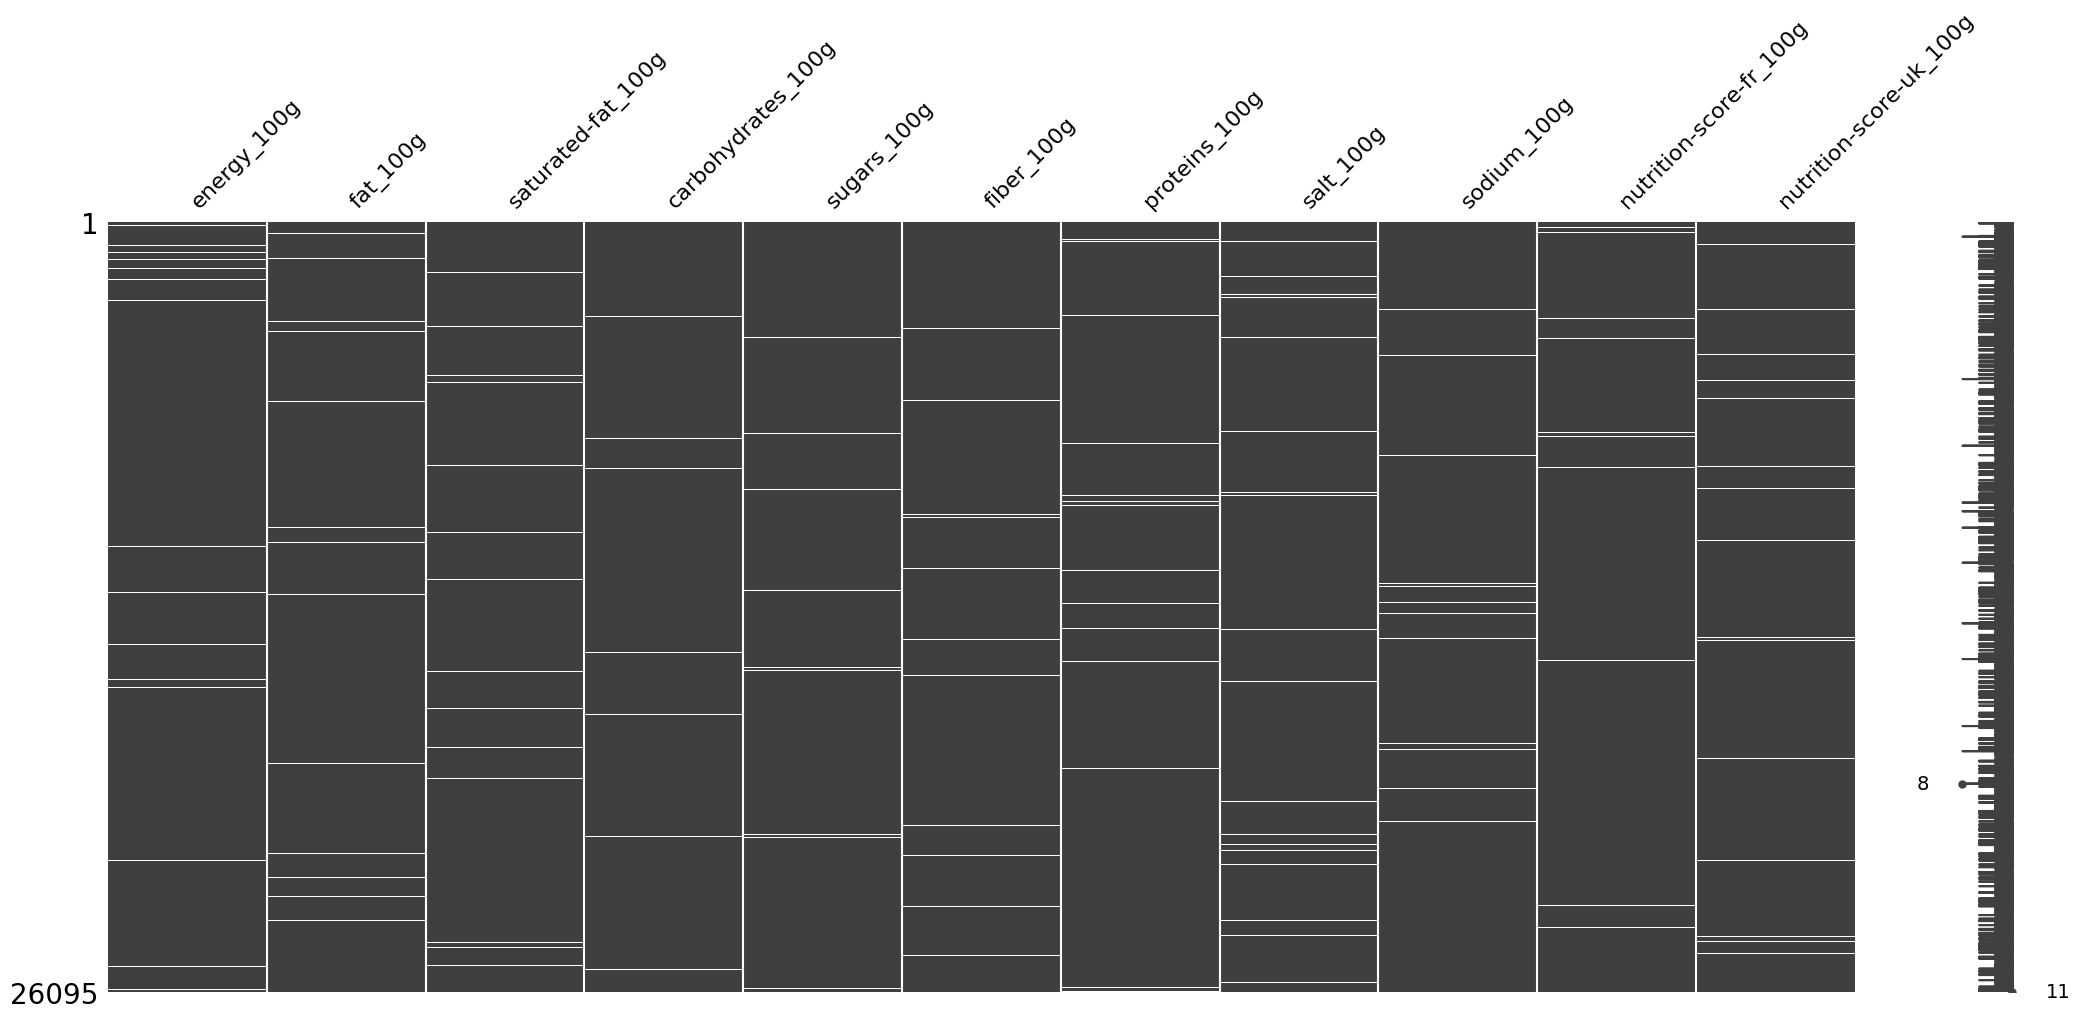

In [66]:
X=complete.copy()
index_rows=np.random.randint(0,complete.shape[0],size=5000)
index_cols=np.random.randint(0,complete.shape[1],size=5000)
for i,j in zip (index_rows,index_cols):
   X.iloc[i,j]=np.nan

msno.matrix(X)

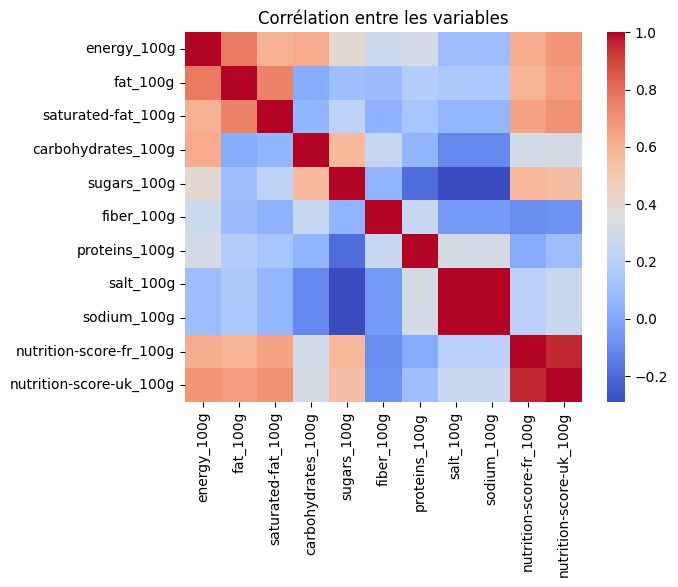

In [67]:
sns.heatmap(X.corr(),cmap='coolwarm')
plt.title('Corrélation entre les variables')
plt.show()

#### Test des imputers

In [68]:
median_imp=SimpleImputer(strategy='median')
iterative_bayridge_imp=IterativeImputer()
iterative_forest_imp=IterativeImputer(estimator=RandomForestRegressor(),n_nearest_features=5,tol=1) #Réduction du nombre de features et augmentation de la tolerance pour earlystop afin de diminue le temps de calcul.
knn_close_imputer=KNNImputer(n_neighbors=10)
knn_far_imputer=KNNImputer(n_neighbors=1000)

In [69]:
def get_imputer_errors (X_imp):
    X_imp=pd.DataFrame(X_imp)
    X_imp.columns=columns
    X_imp.index=index

    print('Mean squared error by column :')
    errors=((X_imp-complete)**2).mean(axis=0)
    display(errors)
    print('Total mean squared error :')
    print(errors.mean().round(2))
    return errors

In [70]:
X_med=median_imp.fit_transform(X)
med_errors=get_imputer_errors(X_med)

Mean squared error by column :


energy_100g                10128.222046
fat_100g                       4.410022
saturated-fat_100g             1.190400
carbohydrates_100g            14.436447
sugars_100g                    6.786476
fiber_100g                     0.258541
proteins_100g                  0.753381
salt_100g                      0.006014
sodium_100g                    0.000931
nutrition-score-fr_100g        1.338954
nutrition-score-uk_100g        1.644108
dtype: float64

Total mean squared error :
923.55


In [71]:
X_iter_bayridge=iterative_bayridge_imp.fit_transform(X)
iter_bayridge_errors=get_imputer_errors(X_iter_bayridge)

Mean squared error by column :


c:\Users\blanc\AppData\Local\pypoetry\Cache\virtualenvs\projet3-NrLTFzdJ-py3.11\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


energy_100g                186.450582
fat_100g                     0.129422
saturated-fat_100g           0.313713
carbohydrates_100g           1.350249
sugars_100g                  1.589756
fiber_100g                   0.153480
proteins_100g                0.303197
salt_100g                    0.000067
sodium_100g                  0.000010
nutrition-score-fr_100g      0.073397
nutrition-score-uk_100g      0.070171
dtype: float64

Total mean squared error :
17.31


In [72]:
X_iter_forest=iterative_forest_imp.fit_transform(X)
iter_forest_errors=get_imputer_errors(X_iter_forest)

Mean squared error by column :


energy_100g                9.128994e+02
fat_100g                   1.256045e-01
saturated-fat_100g         5.897503e-02
carbohydrates_100g         9.177865e-01
sugars_100g                5.116931e-01
fiber_100g                 1.002804e-01
proteins_100g              1.267155e-01
salt_100g                  1.229403e-03
sodium_100g                4.677597e-07
nutrition-score-fr_100g    2.700449e-02
nutrition-score-uk_100g    5.336835e-03
dtype: float64

Total mean squared error :
83.16


In [73]:
X_knn_close=knn_close_imputer.fit_transform(X)
knn_close_errors=get_imputer_errors(X_knn_close)

Mean squared error by column :


energy_100g                286.487192
fat_100g                     0.190148
saturated-fat_100g           0.165165
carbohydrates_100g           2.102703
sugars_100g                  0.843271
fiber_100g                   0.122168
proteins_100g                0.150206
salt_100g                    0.001541
sodium_100g                  0.000217
nutrition-score-fr_100g      0.089472
nutrition-score-uk_100g      0.053803
dtype: float64

Total mean squared error :
26.38


In [74]:
X_knn_far=knn_far_imputer.fit_transform(X)
knn_far_errors=get_imputer_errors(X_knn_far)

Mean squared error by column :


energy_100g                770.158203
fat_100g                     1.040301
saturated-fat_100g           0.572288
carbohydrates_100g           4.475219
sugars_100g                  3.375320
fiber_100g                   0.192411
proteins_100g                0.477275
salt_100g                    0.004432
sodium_100g                  0.000681
nutrition-score-fr_100g      0.486674
nutrition-score-uk_100g      0.508217
dtype: float64

Total mean squared error :
71.03


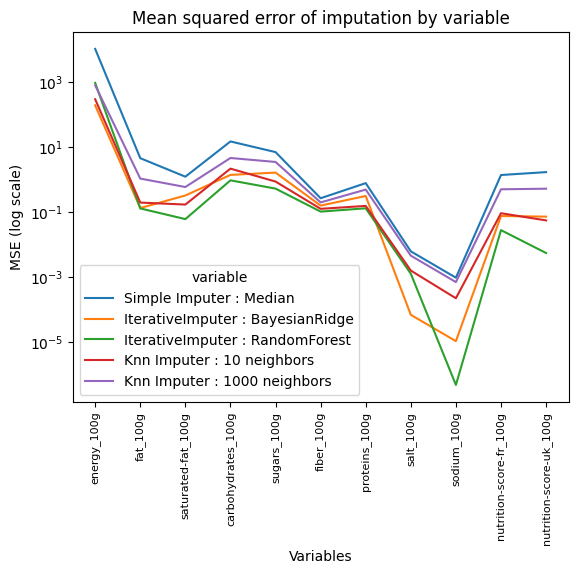

In [75]:
imp_errors=pd.DataFrame({'Simple Imputer : Median':med_errors,
                         'IterativeImputer : BayesianRidge':iter_bayridge_errors,
                         'IterativeImputer : RandomForest' :iter_forest_errors,
                         'Knn Imputer : 10 neighbors' : knn_close_errors,
                         'Knn Imputer : 1000 neighbors' : knn_far_errors                         
                         })

sns.lineplot(data=imp_errors.reset_index().melt(id_vars='index'),x='index',y='value',hue='variable')
plt.yscale('log')
plt.xticks(rotation=90,size=8)
plt.xlabel('Variables')
plt.ylabel('MSE (log scale)')
plt.title('Mean squared error of imputation by variable')
plt.show()

Rq:

SimpleImputer donne sans surprise les moins bons résultats.

IterativeImputer avec BayesianRidge comme estimateur donne de très bons résultats pour le sel et sodium (qui sont en effet reliés par une relation linéaire), également pour le gras et les carbohydrates, mais étonnament moins pour les acides gras saturés et les sucres, pourtant corrélés à ces derniers, peut être à cause de leur moindre corrélation avec l'énergie.

kNN-Imputer a faible nombre de voisins, IterativeImputer avec BayesianRidge et IterativeImputer avec RandomForest donnent globalement les meilleurs résultats et ce pour l'ensemble des variables. IterativeImputer avec RandomForest nécessite cependant un temps de calcul plus élévé. Il est donc intéressant de voir si un paramètrage plus fin de kNN-Imputer permet d'obtenir des résultats équivalents.

#### Ajustement des paramètres de knn-imputer

In [76]:
def silent_get_imputer_errors (X_imp):
    X_imp=pd.DataFrame(X_imp)
    X_imp.columns=columns
    X_imp.index=index
    errors=((X_imp-complete)**2).mean(axis=0)
    return errors

In [77]:
knn_errors=pd.DataFrame()
for n in range(2,500,100):   
    knn_imputer=KNNImputer(n_neighbors=n)
    X_knn=knn_imputer.fit_transform(X)
    new_errors=silent_get_imputer_errors(X_knn)
    new_errors.name=str(n)+'nn Imputer'
    knn_errors=pd.concat([knn_errors,new_errors],axis=1)

knn_errors
    

,2nn Imputer,102nn Imputer,202nn Imputer,302nn Imputer,402nn Imputer
energy_100g,338.520156,365.592933,419.084341,544.869485,598.814576
fat_100g,0.242774,0.562594,1.139249,1.437047,1.416405
saturated-fat_100g,0.115653,0.245233,0.316670,0.417710,0.492214
carbohydrates_100g,2.523767,2.749772,3.188018,3.503641,3.723357
sugars_100g,0.702100,1.420019,1.835206,2.136110,2.408311
fiber_100g,0.098599,0.153565,0.165093,0.172836,0.177026
proteins_100g,0.166767,0.300480,0.356592,0.401057,0.427277
salt_100g,0.001488,0.002679,0.003074,0.003376,0.003660
sodium_100g,0.000193,0.000383,0.000456,0.000516,0.000559
nutrition-score-fr_100g,0.083713,0.194616,0.263792,0.313901,0.350001


In [78]:
knn_errors=pd.DataFrame()
for n in range(2,100,10):   
    knn_imputer=KNNImputer(n_neighbors=n)
    X_knn=knn_imputer.fit_transform(X)
    new_errors=silent_get_imputer_errors(X_knn)
    new_errors.name=str(n)+'nn Imputer'
    knn_errors=pd.concat([knn_errors,new_errors],axis=1)

knn_errors

,2nn Imputer,12nn Imputer,22nn Imputer,32nn Imputer,42nn Imputer,52nn Imputer,62nn Imputer,72nn Imputer,82nn Imputer,92nn Imputer
energy_100g,338.520156,282.100782,321.617277,342.201556,361.656090,352.350232,351.189344,349.355401,346.793588,358.357844
fat_100g,0.242774,0.184428,0.207349,0.232031,0.259965,0.310776,0.363973,0.418257,0.449714,0.504923
saturated-fat_100g,0.115653,0.169089,0.181050,0.193299,0.216792,0.219351,0.227103,0.230001,0.242568,0.246376
carbohydrates_100g,2.523767,2.055208,2.258979,2.333889,2.464100,2.563068,2.635198,2.664305,2.680989,2.698821
sugars_100g,0.702100,0.865903,0.917439,1.009823,1.126555,1.211740,1.234563,1.290679,1.331823,1.366388
fiber_100g,0.098599,0.124722,0.136244,0.140842,0.142228,0.144486,0.144809,0.147595,0.149342,0.151763
proteins_100g,0.166767,0.157756,0.201945,0.228032,0.246598,0.258156,0.267265,0.273816,0.284447,0.291819
salt_100g,0.001488,0.001610,0.001862,0.002017,0.002118,0.002247,0.002348,0.002424,0.002532,0.002626
sodium_100g,0.000193,0.000216,0.000259,0.000291,0.000311,0.000326,0.000341,0.000352,0.000364,0.000374
nutrition-score-fr_100g,0.083713,0.091878,0.109361,0.128030,0.140649,0.152189,0.162185,0.169824,0.178278,0.186873


In [79]:
knn_errors=pd.DataFrame()
for n in range(2,20,2):   
    knn_imputer=KNNImputer(n_neighbors=n)
    X_knn=knn_imputer.fit_transform(X)
    new_errors=silent_get_imputer_errors(X_knn)
    new_errors.name=str(n)+'nn Imputer'
    knn_errors=pd.concat([knn_errors,new_errors],axis=1)

knn_errors.round(2)

,2nn Imputer,4nn Imputer,6nn Imputer,8nn Imputer,10nn Imputer,12nn Imputer,14nn Imputer,16nn Imputer,18nn Imputer
energy_100g,338.52,317.55,327.14,313.06,286.49,282.10,290.06,299.04,308.61
fat_100g,0.24,0.21,0.19,0.20,0.19,0.18,0.20,0.20,0.20
saturated-fat_100g,0.12,0.14,0.15,0.15,0.17,0.17,0.17,0.18,0.18
carbohydrates_100g,2.52,2.12,2.16,2.15,2.10,2.06,2.11,2.19,2.23
sugars_100g,0.70,0.67,0.73,0.78,0.84,0.87,0.88,0.89,0.90
fiber_100g,0.10,0.11,0.11,0.12,0.12,0.12,0.13,0.13,0.13
proteins_100g,0.17,0.14,0.13,0.14,0.15,0.16,0.16,0.17,0.19
salt_100g,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sodium_100g,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nutrition-score-fr_100g,0.08,0.08,0.08,0.09,0.09,0.09,0.10,0.10,0.10


In [80]:
fig=px.line(data_frame=knn_errors.reset_index().melt(id_vars='index'),x='index',y='value',color='variable')
fig.update_yaxes(type='log')
fig.show()

In [81]:
imp_errors=pd.concat([imp_errors,knn_errors['6nn Imputer']],axis=1)
imp_errors

,Simple Imputer : Median,IterativeImputer : BayesianRidge,IterativeImputer : RandomForest,Knn Imputer : 10 neighbors,Knn Imputer : 1000 neighbors,6nn Imputer
energy_100g,10128.222046,186.450582,9.128994e+02,286.487192,770.158203,327.143012
fat_100g,4.410022,0.129422,1.256045e-01,0.190148,1.040301,0.192721
saturated-fat_100g,1.190400,0.313713,5.897503e-02,0.165165,0.572288,0.153686
carbohydrates_100g,14.436447,1.350249,9.177865e-01,2.102703,4.475219,2.156845
sugars_100g,6.786476,1.589756,5.116931e-01,0.843271,3.375320,0.731826
fiber_100g,0.258541,0.153480,1.002804e-01,0.122168,0.192411,0.107912
proteins_100g,0.753381,0.303197,1.267155e-01,0.150206,0.477275,0.133239
salt_100g,0.006014,0.000067,1.229403e-03,0.001541,0.004432,0.001431
sodium_100g,0.000931,0.000010,4.677597e-07,0.000217,0.000681,0.000194
nutrition-score-fr_100g,1.338954,0.073397,2.700449e-02,0.089472,0.486674,0.083547


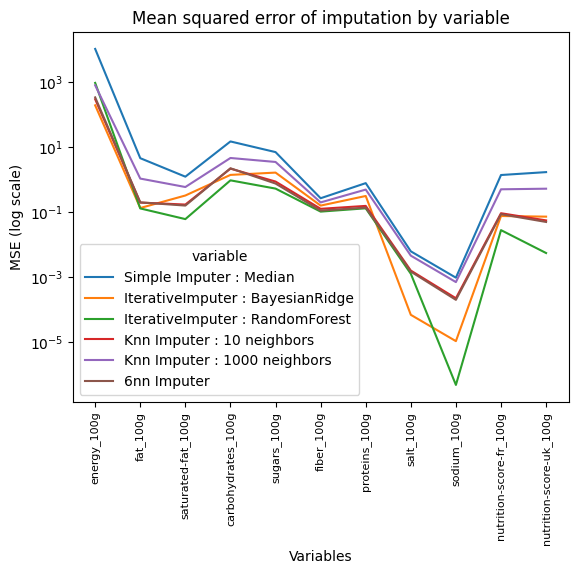

In [82]:
sns.lineplot(data=imp_errors.reset_index().melt(id_vars='index'),x='index',y='value',hue='variable')
plt.yscale('log')
plt.xticks(rotation=90,size=8)
plt.xlabel('Variables')
plt.ylabel('MSE (log scale)')
plt.title('Mean squared error of imputation by variable')
plt.show()

L'affinage des paramètres de Knn n'a pas permis de dimuner l'erreur suffisament pour être compétitif avec IterativeImputer (RandomForest). Il pourra être utilisé dans le cas où la contrainte sur le temps de calcul est plus importante que l'erreur engendrée.

#### Vérification de la performance sans les données de nutriscore

<Axes: >

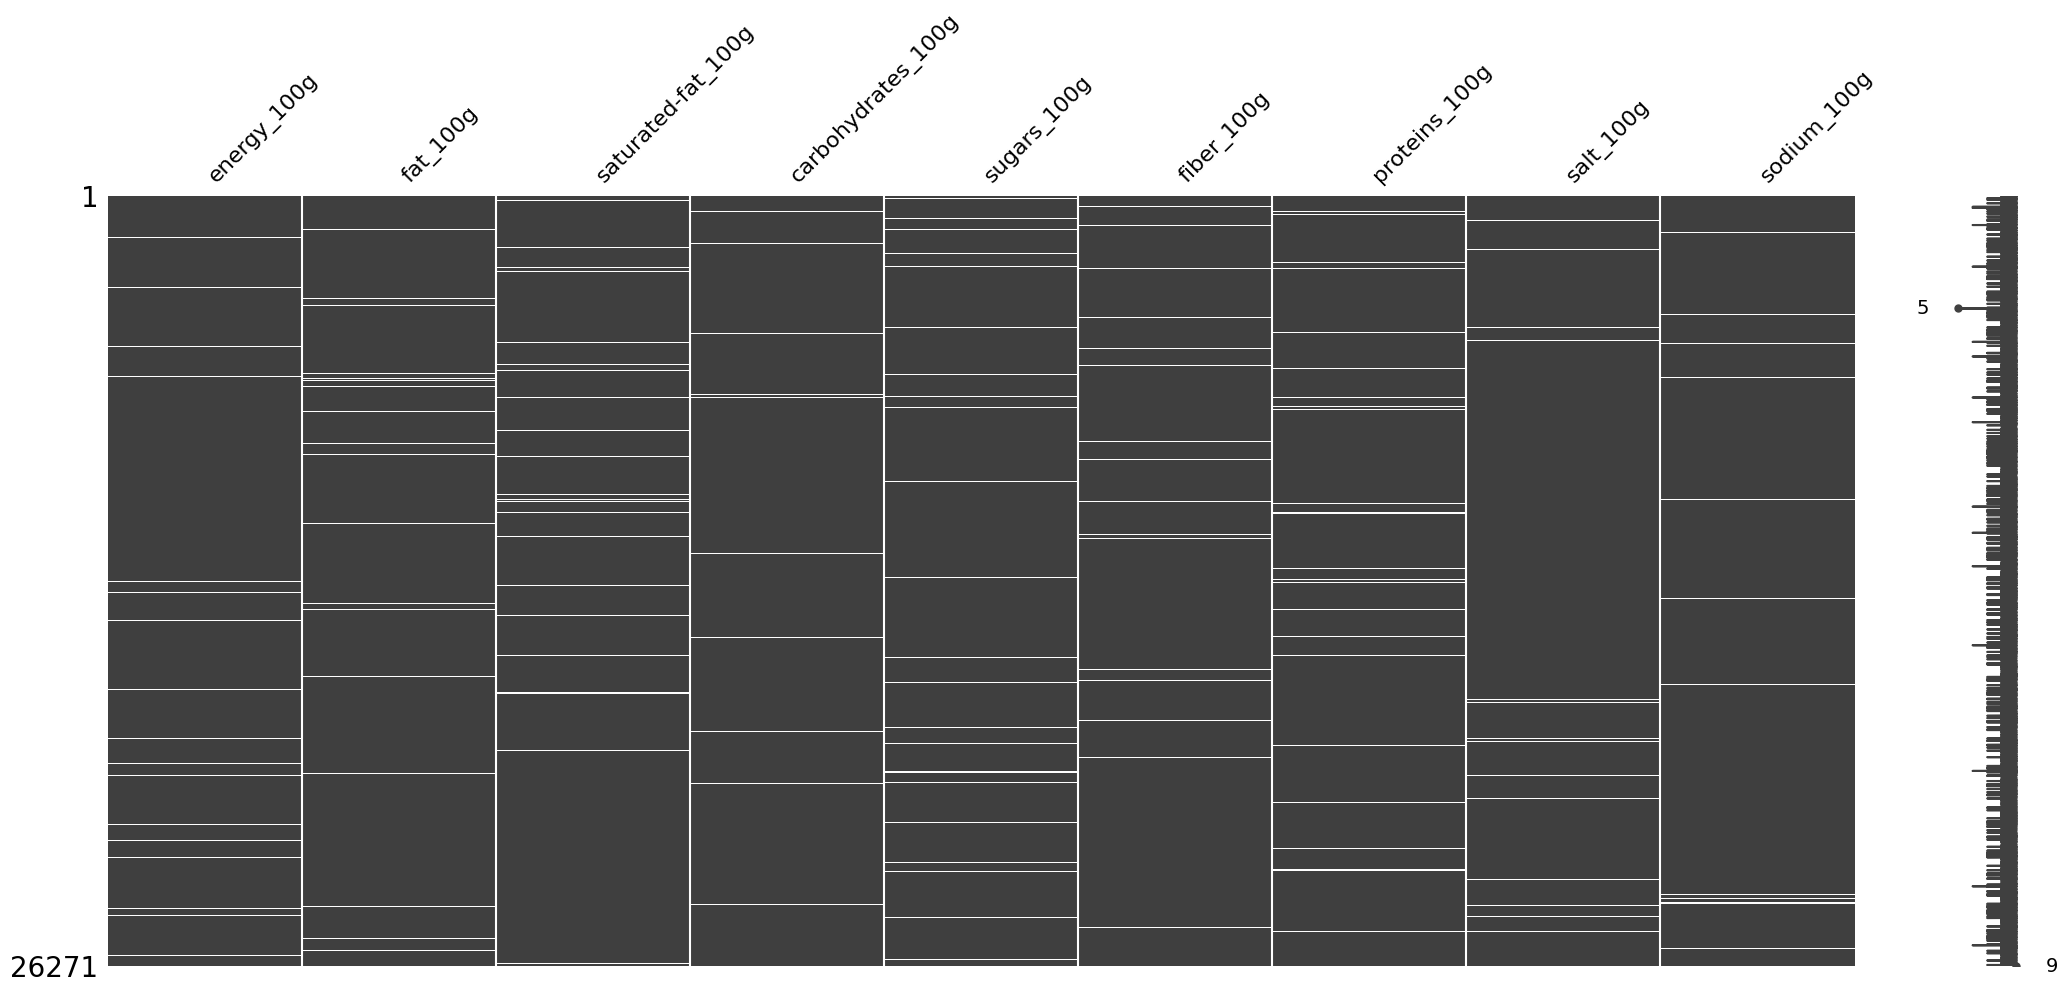

In [83]:
complete=filtered_df.iloc[:,5:-2].dropna(axis=0)
columns=complete.columns
index=complete.index

X=complete.copy()
index_rows=np.random.randint(0,complete.shape[0],size=5000)
index_cols=np.random.randint(0,complete.shape[1],size=5000)
for i,j in zip (index_rows,index_cols):
   X.iloc[i,j]=np.nan

msno.matrix(X)

In [84]:
X_iter_bayridge=iterative_bayridge_imp.fit_transform(X)
iter_bayridge_errors=get_imputer_errors(X_iter_bayridge)

Mean squared error by column :


c:\Users\blanc\AppData\Local\pypoetry\Cache\virtualenvs\projet3-NrLTFzdJ-py3.11\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



energy_100g           254.804827
fat_100g                0.211372
saturated-fat_100g      0.523137
carbohydrates_100g      1.625073
sugars_100g             3.175364
fiber_100g              0.225090
proteins_100g           0.348824
salt_100g               0.000030
sodium_100g             0.000005
dtype: float64

Total mean squared error :
28.99


In [85]:
X_iter_forest=iterative_forest_imp.fit_transform(X)
iter_forest_errors=get_imputer_errors(X_iter_forest)

Mean squared error by column :


energy_100g           2.377561e+02
fat_100g              2.120728e-01
saturated-fat_100g    1.989410e-01
carbohydrates_100g    1.049986e+00
sugars_100g           1.049058e+00
fiber_100g            6.284890e-02
proteins_100g         3.087268e-01
salt_100g             5.915995e-06
sodium_100g           8.638115e-07
dtype: float64

Total mean squared error :
26.74


In [86]:
knn_imputer=KNNImputer(n_neighbors=6)
X_knn=knn_imputer.fit_transform(X)
knn_errors=get_imputer_errors(X_knn)

Mean squared error by column :


energy_100g           571.021826
fat_100g                0.568284
saturated-fat_100g      0.423423
carbohydrates_100g      3.488074
sugars_100g             2.008304
fiber_100g              0.156198
proteins_100g           0.384037
salt_100g               0.002984
sodium_100g             0.000404
dtype: float64

Total mean squared error :
64.23


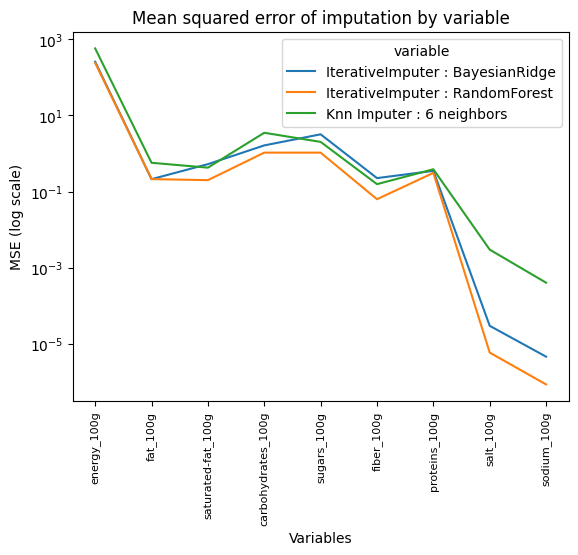

In [87]:
imp_errors=pd.DataFrame({'IterativeImputer : BayesianRidge':iter_bayridge_errors,
                         'IterativeImputer : RandomForest' :iter_forest_errors,
                         'Knn Imputer : 6 neighbors' : knn_errors,                      
                         })

sns.lineplot(data=imp_errors.reset_index().melt(id_vars='index'),x='index',y='value',hue='variable')
plt.yscale('log')
plt.xticks(rotation=90,size=8)
plt.xlabel('Variables')
plt.ylabel('MSE (log scale)')
plt.title('Mean squared error of imputation by variable')
plt.show()

IterativeImputer avec RandomForest donne également les meilleurs résultats dans le cas où les nutriscores ne sont pas disponibles.

#### Imputation des données dans le dataset initial avec IterativeImputer

In [117]:
num_imputer = IterativeImputer(estimator=RandomForestRegressor(),n_nearest_features=5,tol=1)
num_cols=filtered_df.iloc[:,filter_num].columns
cat_imputer=SimpleImputer(strategy='constant',fill_value='unknown')
cat_cols=filtered_df.iloc[:,~np.array(filter_num)].columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_imputer, cat_cols),
        ('num', num_imputer, num_cols),
    ])

imputed_df=preprocessor.fit_transform(filtered_df)

In [172]:
def impute (df):
    filter_num=['_100g' in str(col) for col in df.columns]
    num_imputer = IterativeImputer(estimator=RandomForestRegressor(),n_nearest_features=5,tol=1)
    num_cols=df.iloc[:,filter_num].columns
    cat_imputer=SimpleImputer(strategy='constant',fill_value='unknown')
    cat_cols=df.iloc[:,~np.array(filter_num)].columns
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_imputer, cat_cols),
        ('num', num_imputer, num_cols),
    ])
    
    imputed_df=preprocessor.fit_transform(df)
    #Post_imputer formating :  
    imputed_df=pd.DataFrame(df)
    imputed_df.index=df.index
    imputed_df.columns=df.columns
    imputed_df = imputed_df.astype({col:float for col in imputed_df.loc[:,filter_num].columns})
    
    #Display distributions
    fig,axes=plt.subplots(-(-len(df.loc[:,filter_num].columns)//3),3,figsize=(15, 15))
    fig.tight_layout(pad=4.0)
    for col,ax in zip(df.loc[:,filter_num].columns,axes.ravel()):
        sns.histplot(df[col],ax=ax,alpha=1)
        sns.histplot(imputed_df[col],ax=ax,alpha=0.3)
    ax.set_yscale("log")
    plt.suptitle('Distributions des variables numériques avant et après imputation')
    plt.show()
    
    return imputed_df
    

In [173]:
imputed_df=impute(filtered_df)

In [119]:
imputed_df=pd.DataFrame(imputed_df)
imputed_df.index=filtered_df.index
imputed_df.columns=filtered_df.columns
imputed_df

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,"France,États-Unis",2017-03-09 10:34:27+00:00,Lion Peanut x2,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0,22.0
190,10187319,France,2017-02-17 10:05:54+00:00,Mini Confettis,unknown,1753.0,7.358,0.8,83.809,87.7,0.9,0.6,0.01,0.003937,14.0,14.0
191,10207260,France,2017-03-22 17:29:17+00:00,Praliné Amande Et Noisette,unknown,2406.0,36.333,2.9,52.665,50.3,3.9,9.5,0.003,0.001181,14.0,14.0
226,40608754,France,2015-08-09 17:35:31+00:00,"Pepsi, Nouveau goût !",Beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,0.01,13.0,2.0
234,69161025,France,2017-03-22 19:59:36+00:00,Tarte Poireaux Et Lardons,unknown,1079.0,16.647,11.0,13.118,1.0,1.4,7.5,0.8,0.314961,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320734,9778564312457,"France,Royaume-Uni",2017-04-02 15:15:34+00:00,Nature cheddar and red onion crisps,Salty snacks,2155.0,31.305,3.4,49.825,1.8,5.6,7.8,1.35,0.531496,9.0,9.0
320740,9782211109758,France,2017-03-08 20:05:58+00:00,Verrine Cheescake Myrtille,unknown,1084.0,18.9127,12.0,11.69,10.5,0.0,8.7,0.29,0.114173,16.0,16.0
320751,9847548283004,France,2015-09-14 13:37:28+00:00,Tartines craquantes bio au sarrasin,Cereals and potatoes,1643.0,2.8,0.6,74.8,2.6,5.9,13.0,0.68,0.267717,-4.0,-4.0
320757,9900000000233,France,2017-04-01 20:52:19+00:00,Amandes,unknown,2406.0,47.443,3.73,13.6675,3.89,12.2,21.22,0.1,0.03937,0.0,0.0


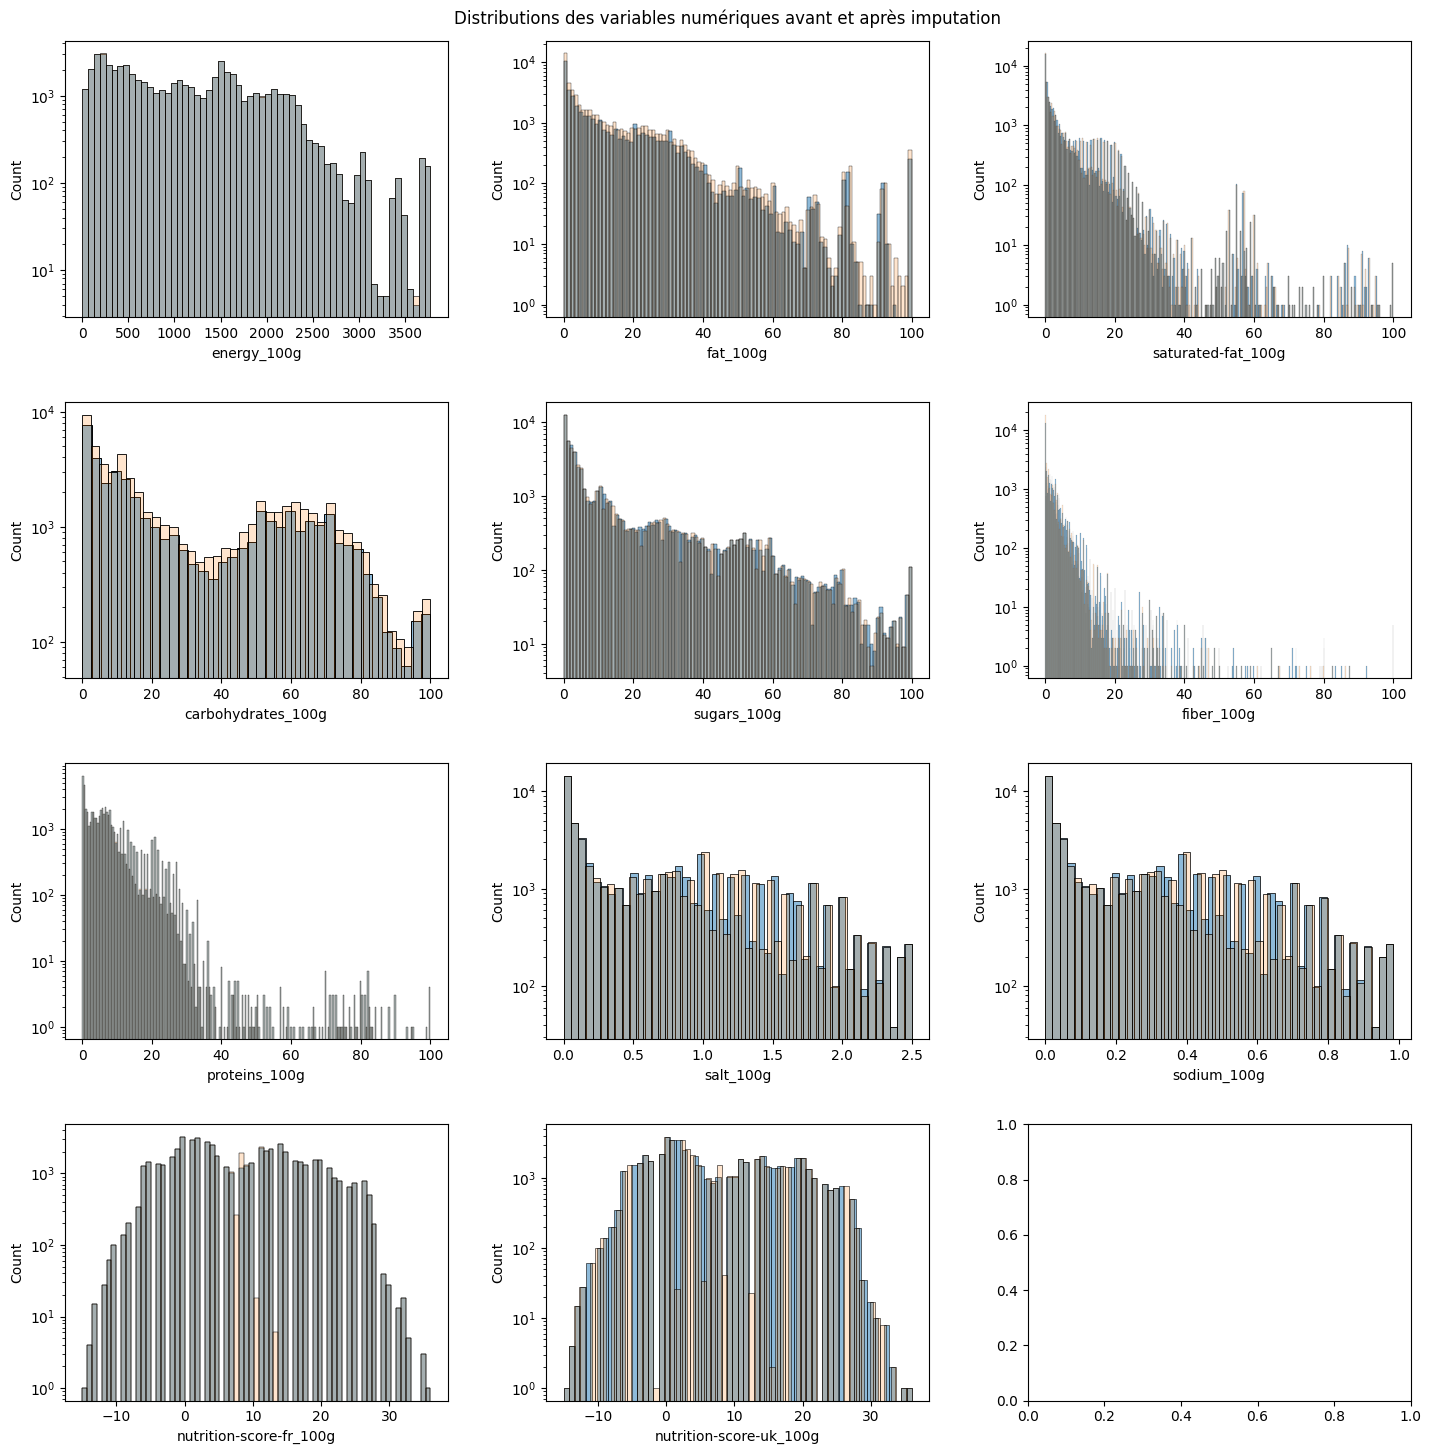

In [120]:
fig,axes=plt.subplots(-(-len(filtered_df.loc[:,filter_num].columns)//3),3,figsize=(15, 15))
fig.tight_layout(pad=4.0)
for col,ax in zip(filtered_df.loc[:,filter_num].columns,axes.ravel()):
    sns.histplot(filtered_df[col],ax=ax,alpha=0.5)
    sns.histplot(imputed_df[col],ax=ax,alpha=0.2)
    ax.set_yscale("log")
plt.suptitle('Distributions des variables numériques avant et après imputation')
plt.show()

In [140]:
display(filtered_df.describe().round(2))
display(imputed_df.loc[:,filter_num].astype('float64').describe().round(2))

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,58073.00,42285.00,57703.00,42219.00,57753.00,42636.00,57978.00,57814.00,57813.00,56956.00,56956.00
mean,1113.43,13.01,5.37,28.67,13.91,2.57,7.29,0.64,0.25,8.15,7.80
std,783.03,16.89,8.49,27.36,19.31,4.45,7.39,0.65,0.25,8.98,9.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00,-15.00
25%,410.00,1.20,0.30,4.80,1.10,0.00,1.60,0.05,0.02,1.00,0.00
50%,1035.00,6.20,1.90,15.80,4.50,1.40,5.80,0.46,0.18,7.00,5.00
75%,1657.00,20.70,7.30,54.00,19.20,3.30,10.00,1.09,0.43,15.00,16.00
max,3774.00,100.00,100.00,100.00,100.00,100.00,100.00,2.50,0.98,36.00,36.00


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,58094.00,58094.00,58094.00,58094.00,58094.00,58094.00,58094.00,58094.00,58094.00,58094.00,58094.00
mean,1113.43,13.22,5.35,29.02,13.88,2.12,7.28,0.64,0.25,8.15,7.78
std,783.07,17.16,8.48,27.32,19.28,3.97,7.39,0.64,0.25,8.89,9.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00,-15.00
25%,410.00,1.20,0.30,5.00,1.10,0.01,1.60,0.06,0.02,1.00,0.00
50%,1035.00,6.40,1.80,16.01,4.40,0.90,5.80,0.45,0.18,7.98,6.00
75%,1657.00,20.93,7.20,54.50,19.00,2.70,10.00,1.09,0.43,15.00,15.00
max,3774.00,100.00,100.00,100.00,100.00,100.00,100.00,2.50,0.98,36.00,36.00


### Création d'une pipeline pour application à un futur dataset

#### Création de 'transformers' à partir des des fonctions de filtrage

In [155]:
filter_df_tf = FunctionTransformer(filter_df)
drop_empty_tf= FunctionTransformer(drop_empty)
drop_outofbounds_tf= FunctionTransformer(drop_outofbounds)
correct_sodium_tf= FunctionTransformer(correct_sodium_unit)
drop_sugar_tf= FunctionTransformer(drop_sugar_anomalies)
drop_fat_tf= FunctionTransformer(drop_fat_anomalies)
replace_labels_tf= FunctionTransformer(replace_labels)


In [ ]:
#Réinitialisation des du dataframe initial
data=pd.read_csv("data\products.csv",sep='	')

#### Création de la pipeline

C:\Users\blanc\AppData\Local\Temp\ipykernel_9512\2155658284.py:1: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.



Filtering dataset for France and selecting columns
Initial row & columns : (320772, 162)
Resulting rows and columns (98440, 104)
Dropping rows without product name, with less than half numerical data per row, duplicated rows and empty columns (>25% nans)
Initial row & columns : (98440, 104)
Resulting rows and columns (62347, 16)
Check nutri-score indicators : Too many missing values for column  fruits-vegetables-nuts_100g . Column will be dropped


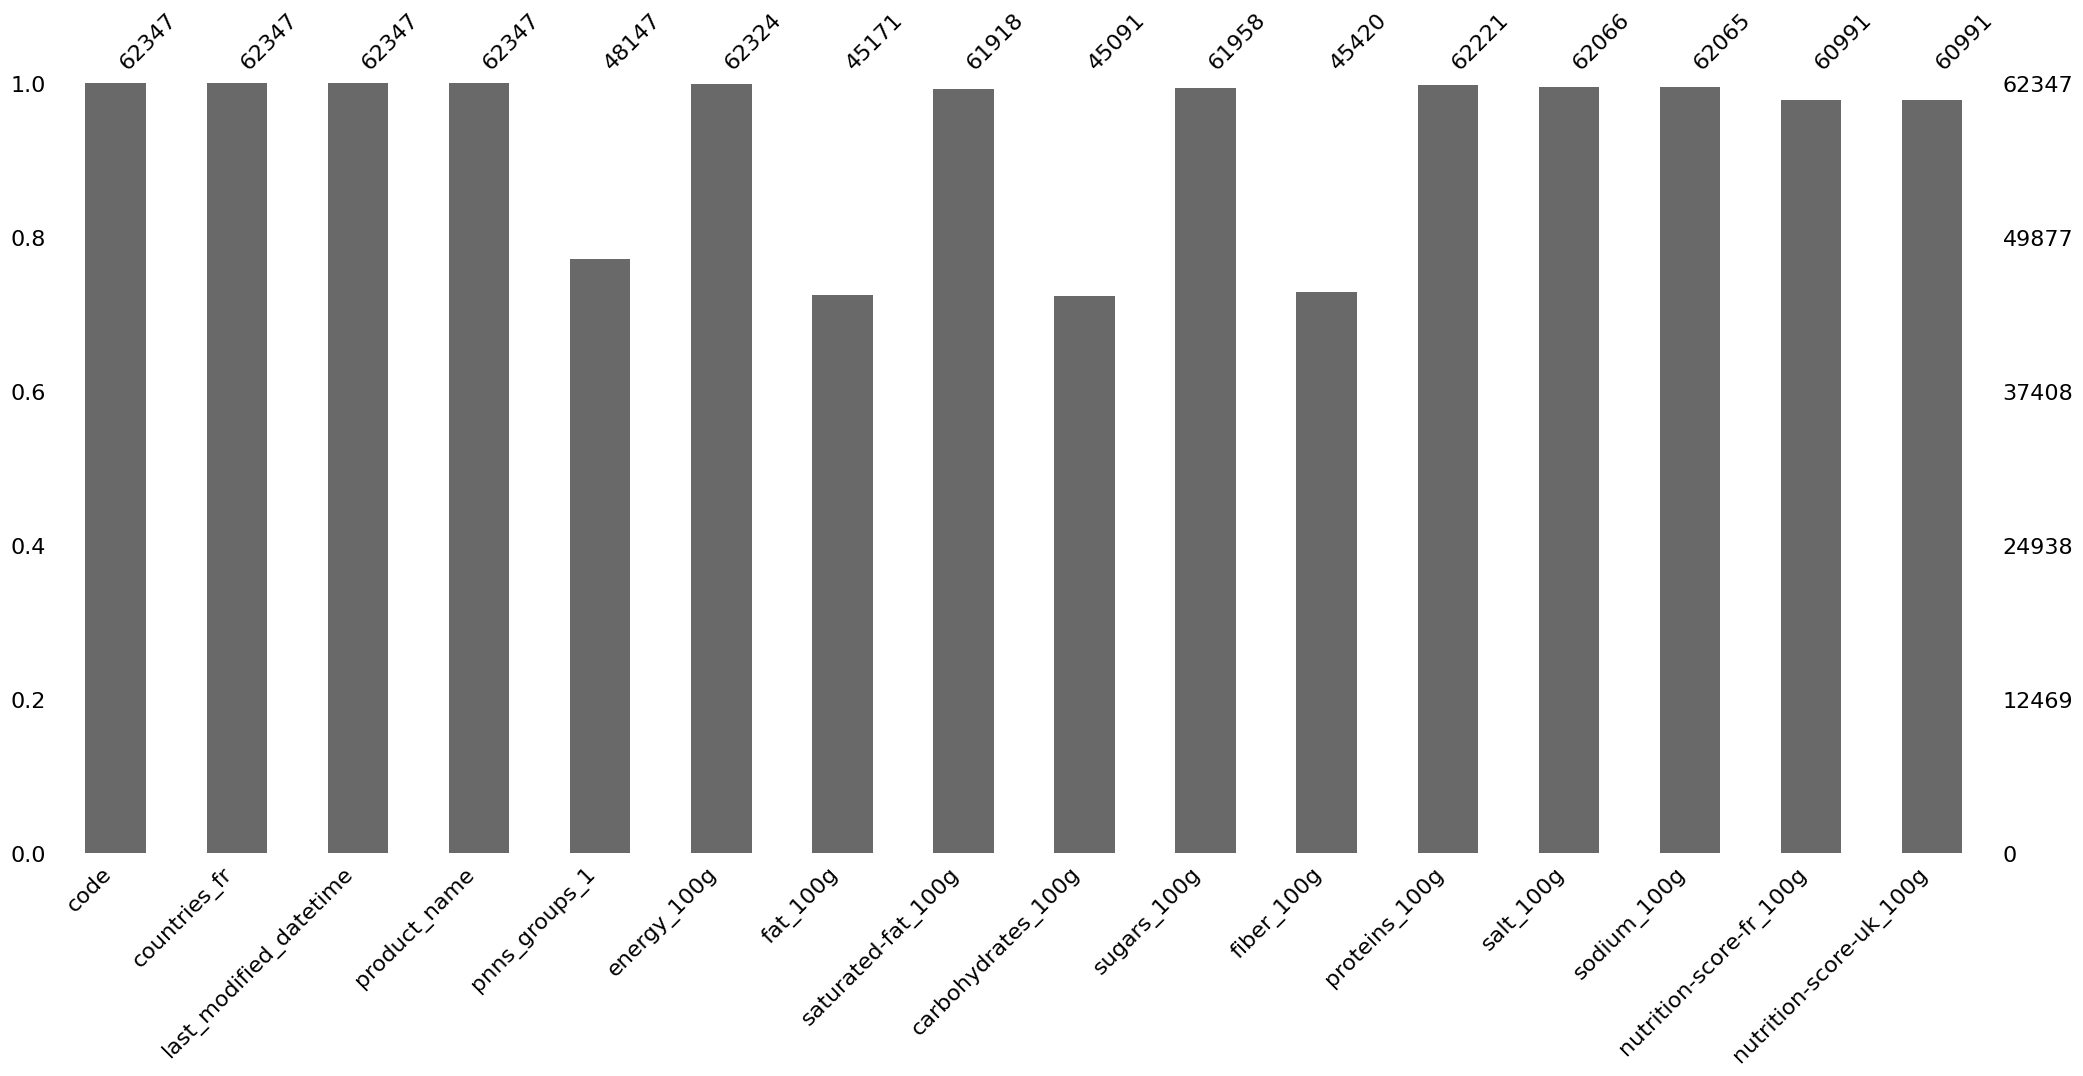

Verification des dépassements des limites de concentration pour 100g
Calories : Valeurs hors limites :  90  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56561,43647390011,France,2017-03-10T20:31:25Z,Tawny' Orange,NaN,5054.0,NaN,0.00,NaN,65.0,0.0,0.0,0.00,0.000000,20.0,20.0
161426,853807005163,France,2017-03-02T13:39:19Z,Huile d'avocat,NaN,3883.0,NaN,15.00,NaN,0.0,0.0,0.0,0.00,0.000000,20.0,20.0
178567,20193447,France,2017-04-08T18:48:53Z,Confiserie Firenze Apfel Streuselkuchen Tiefge...,NaN,4197.0,NaN,3.90,NaN,18.5,0.0,2.9,0.11,0.043307,17.0,17.0
178787,20233679,France,2017-04-20T07:42:28Z,Halva with Almonds,Sugary snacks,9983.0,36.8,7.80,44.2,32.0,NaN,12.9,0.00,0.000000,24.0,24.0
179179,2030502431284,France,2017-02-19T13:55:36Z,Lot De 4 Baguettes,NaN,4184.0,NaN,0.00,NaN,0.0,0.0,0.0,0.00,0.000000,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304297,8016857024016,France,2017-02-23T11:28:53Z,Gnocchi E Pasta Fresca,NaN,4828.0,NaN,3.52,NaN,1.9,2.3,9.8,1.12,0.440945,14.0,14.0
305223,8034063244592,France,2017-02-25T14:49:11Z,Miel D'eucalyptus,NaN,5749.0,NaN,0.00,NaN,80.0,0.0,0.4,0.01,0.003937,20.0,20.0
313852,8711200595631,France,2017-04-20T17:51:02Z,Cornetto Mini X8 Fruit,NaN,5644.0,NaN,13.00,NaN,24.0,0.0,3.7,0.12,0.047244,25.0,25.0
319695,9310804500189,France,2017-03-15T10:39:08Z,Miel,NaN,5925.0,NaN,0.00,NaN,82.0,0.0,0.0,0.00,0.000000,20.0,20.0


fat_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
305054,8032942610032,France,2017-03-17T14:09:22Z,Graine de couscous moyen,Cereals and potatoes,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0,-1.0


carbohydrates_100g : Valeurs hors limites :  4  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
155609,838619000254,France,2017-02-14T14:27:14Z,Beurre d'érable,unknown,1390.0,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN,NaN
202571,3229820787909,France,2015-04-07T17:17:55Z,Sirop d'Agave brun bio,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14,0.05510,15.0,15.0
260599,4016249015732,France,2016-11-26T09:38:10Z,Sirop d agave pur,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10,0.03937,15.0,15.0
317635,8935000901649,France,2017-03-08T21:19:58Z,Banane sèche,Fruits and vegetables,1259.0,0.0,0.0,139.0,41.5,0.0,5.0,0.00,0.00000,4.0,4.0


sugars_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
195761,3161712000928,France,2016-06-11T15:40:10Z,Caprice des dieux,Milk and dairy products,1379.0,30.0,21.0,0.8,-0.1,NaN,15.3,1.4,0.551181,15.0,20.0


fiber_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
298897,7622210988768,France,2017-04-16T19:38:10Z,Milka Schmunzelhase Alpenmilch 175G,unknown,2218.0,29.0,18.0,59.0,58.0,178.0,6.3,0.37,0.145669,22.0,22.0


salt_100g : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
232239,3423720002432,France,2017-02-01T21:21:33Z,Keeny Bio,Sugary snacks,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0,22.0
233372,3445850070259,France,2017-03-03T14:08:14Z,Sel de Guérande Label Rouge,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0,10.0


Correction des unités de sodium et suppression des lignes en anomalie
Nombre de lignes initial= 62248
Nombre de lignes final= 58151
Suppression des anomalies en sucre
Nombre de lignes initial= 58151
Nombre de lignes final= 58111
Suppression des anomalies en gras
Nombre de lignes initial= 58111
Nombre de lignes final= 58111
Correcting labels for pnns_groups_1 :
Initial labels : ['unknown' nan 'Beverages' 'Sugary snacks' 'Composite foods'
 'Fruits and vegetables' 'Milk and dairy products' 'Salty snacks'
 'Cereals and potatoes' 'Fat and sauces' 'Fish Meat Eggs'
 'fruits-and-vegetables' 'sugary-snacks' 'cereals-and-potatoes']
Corrected labels : ['unknown' nan 'Beverages' 'Sugary snacks' 'Composite foods'
 'Fruits and vegetables' 'Milk and dairy products' 'Salty snacks'
 'Cereals and potatoes' 'Fat and sauces' 'Fish Meat Eggs']


array([[36252, 'France,États-Unis', '2017-03-09T10:34:27Z', ..., 0.038,
        22.0, 22.0],
       [10187319, 'France', '2017-02-17T10:05:54Z', ...,
        0.0039370078740157, 14.0, 14.0],
       [10207260, 'France', '2017-03-22T17:29:17Z', ...,
        0.0011811023622047, 14.0, 14.0],
       ...,
       ['9847548283004', 'France', '2015-09-14T13:37:28Z', ...,
        0.267716535433071, -4.0, -4.0],
       ['9900000000233', 'France', '2017-04-01T20:52:19Z', ...,
        0.0393700787401575, 0.0, 0.0],
       ['99111250', 'France', '2013-06-20T01:09:16Z', ..., 0.01, 2.0,
        0.0]], dtype=object)

In [157]:

pipeline=Pipeline(steps=[
    ('Filter data',filter_df_tf),
    ('Drop empty',drop_empty_tf),
    ('Drop outliers',drop_outofbounds_tf),
    ('Correct sodium unit',correct_sodium_tf),
    ('Drop sugar anomalies',drop_sugar_tf),
    ('Drop fat anomalies',drop_fat_tf),
    ('Replace cat labels',replace_labels_tf),
    ('Imputer',preprocessor),
    ('estimator',None)
])

pipeline.transform(data)

In [141]:
# Todo vérifier que même dataset à la fin